In [1]:
import os
from tqdm.auto import tqdm
%load_ext autoreload
%autoreload 2
from helpers import get_df_from_logdir
import pandas as pd
import plotly.express as px
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from tqdm.contrib.concurrent import process_map
pd.set_option('display.max_columns', None)

In [3]:
config_name = 'rl_const_sparsity_obs_space_env_ve2_with_rew_done_ve2_modes_ablation'
path = f"/home/upload/ray_results/{config_name}/"
trials = os.listdir(path)
trials = [os.path.join(path, trial) for trial in trials]
trials = sorted(filter(os.path.isdir, trials))
print(f"Got {len(trials)} trials")

FileNotFoundError: [Errno 2] No such file or directory: '/home/upload/ray_results/rl_const_sparsity_obs_space_env_ve2_with_rew_done_ve2_modes_ablation/'

# Reading trial data

In [4]:
def get_last_epoch(trial):
    """Get last row with epoch data."""
    try:
        df = get_df_from_logdir(trial, do_tqdm=False)
    except FileNotFoundError:
        return None
    if hasattr(df, 'epochs'):
        df = df[df.epochs==max(df.epochs)]
        return df.iloc[0]
    return None

df = process_map(get_last_epoch, trials, max_workers=4)
#df = [get_last_epoch(trial) for trial in tqdm(trials)]
df = pd.DataFrame([x for x in df if x is not None])
df.to_csv(f'{config_name}.csv', index=False)

In [4]:
df = pd.read_csv(f'{config_name}.csv')
df

,epochs,n_samples,losses/opt1/fit/coeff,losses/opt1/fit/value,losses/opt1/sparsity/coeff,losses/opt1/sparsity/value,losses/opt1/fit_all_on/coeff,losses/opt1/fit_all_on/value,losses/opt1/reconstruction/coeff,losses/opt1/reconstruction/value,losses/opt1/fit_all_half/coeff,losses/opt1/fit_all_half/value,losses/opt1/value,grads/opt1/grad_total_l1mean,grads/opt1/grad_total_l2sum,metrics/batch_index,metrics/batch_size,metrics/fit/mean_feature,metrics/fit/std_feature,metrics/fit/min_feature,metrics/fit/max_feature,metrics/fit/loss_fcons,metrics/fit/loss_add,metrics/fit/loss_rec,metrics/fit/loss_fcons_pre,metrics/fit/rec_fit_acc_loss_01_agg,"metrics/sparsity/sparsity_param_0_(5, 5)",metrics/fit_all_on/mean_feature,metrics/fit_all_on/std_feature,metrics/fit_all_on/min_feature,metrics/fit_all_on/max_feature,metrics/fit_all_on/loss_fcons,metrics/fit_all_on/loss_add,metrics/fit_all_on/loss_rec,metrics/fit_all_on/loss_fcons_pre,metrics/fit_all_on/rec_fit_acc_loss_01_agg,metrics/reconstruction/rec_acc_loss_01_agg,metrics/fit_all_half/mean_feature,metrics/fit_all_half/std_feature,metrics/fit_all_half/min_feature,metrics/fit_all_half/max_feature,metrics/fit_all_half/loss_fcons,metrics/fit_all_half/loss_add,metrics/fit_all_half/loss_rec,metrics/fit_all_half/loss_fcons_pre,metrics/fit_all_half/rec_fit_acc_loss_01_agg,metrics/episode_reward,metrics/fit_loss_smooth,metrics/graph_entropy_ma,metrics/graph_entropy_mf,metrics/max_element_ma,metrics/max_element_mf,metrics/nnz,metrics/non_sparse_fit_loss_smooth,metrics/threshold_action,metrics/threshold_annealer_threshold,metrics/threshold_features,metrics/|last_add_sparsity_gap,metrics/|last_mult_sparsity_gap,CausalModel,threshold_learner_feature,model,checkpoint_tune,checkpoint_size,time_this_iter_s,should_checkpoint,done,timesteps_total,episodes_total,training_iteration,experiment_id,date,timestamp,time_total_s,pid,hostname,node_ip,config/name,config/base_dir,config/db_name,config/sources,config/log_sys_usage,config/_gin__mode__grid_search,time_since_restore,timesteps_since_restore,iterations_since_restore,perf/cpu_util_percent,perf/ram_util_percent,trial_id,experiment_tag,metrics/context_stats_steps_sampled_laps,metrics/context_stats_pending_refs,threshold_learner_action,metrics/context_stats_collect_time_s,metrics/context_stats_steps_collected_now,metrics/context_stats_steps_collected_laps,metrics/context_stats_collect_iters,metrics/context_stats_steps_collected,metrics/context_stats_steps_sampled,metrics/context_stats_collected_sampled_ratio,perf/gpu_util_percent0,perf/vram_util_percent0,perf/gpu_util_percent1,perf/vram_util_percent1,config/_gin__mode__choice
0,44995.0,1000.0,0.33,0.051851,0.04,12.120171,0.1,0.046217,0.029,0.061438,0.0033,5.142248,0.525290,0.009180,0.973842,0.0,-1.0,[ 3.31937 -1.9461856 -5.2760997],[ 8.973777 9.844874 14.417334],-37.237144,36.565769,0.004782,0.011885,0.051851,0.004459,1.000200,12.120171,[ 3.31937 -1.9461856 -5.2760997],[ 8.973777 9.844874 14.417334],-37.237144,36.565769,0.004540,0.008305,0.046217,0.004210,1.000143,1.000229,[ 3.31937 -1.9461856 -5.2760997],[ 8.973777 9.844874 14.417334],-37.237144,36.565769,0.015750,0.343351,5.142248,0.014643,1.034314,6.015873,0.029910,[0.05315484 0.00119944 0.00102118 0.05309877 0...,[0.00102118 0.05320504 0.05374547 0.05213669 0...,1.001113,1.001083,12.0,0.029577,0.097328,0.001,0.097301,0.000333,0.011127,NaN,NaN,NaN,NaN,NaN,0.267706,NaN,False,NaN,NaN,44996,a44dcccbd2314e0fb3552d4ddf391e1a,2021-02-27_13-23-39,1614432219,9814.107047,11471,2bc0ee4f9cd2,172.28.0.2,rl_const_sparsity_obs_space_env_ve2_with_rew_d...,/root/causality-disentanglement-rl/results/rl_...,causal_sparse,['/root/causality-disentanglement-rl/sparse_ca...,True,single_model_dec,9814.107047,0,44996,NaN,NaN,264be_00000,0__gin__mode__grid_search=single_model_dec,450.14,11.0,NaN,0.000004,0.0,225.08955,0.0,22508955.0,45014000.0,0.500043,NaN,NaN,NaN,NaN,NaN
1,44995.0,1000.0,0.33,0.039627,0.04,12.128637,0.1,0.041636,0.029,0.157618,0.0033,6.593586,0.528716,0.013654,0.6654

In [5]:
# del df['losses/opt1/value']
# del df['metrics/episode_reward']
# del df['metrics/non_sparse_fit_loss_smooth']
# del df['metrics/context_stats_steps_collected_laps']
# del df['metrics/context_stats_collect_iters']
# del df['metrics/context_stats_collect_time_s']
# del df['metrics/context_stats_steps_collected_now']
# del df['metrics/context_stats_pending_refs']
# del df['metrics/context_stats_steps_collected']
# del df['metrics/context_stats_steps_sampled_laps']
# del df['metrics/context_stats_collected_sampled_ratio']
# del df['metrics/context_stats_steps_sampled']

In [6]:
all_fields = [c for c in df.columns if any([c.startswith(t) for t in ['losses', 'metrics', 'config']])]
all_fields = [f for f in all_fields if len(set(df[f])) > 1]
all_fields.append('time_total_s')
# all_fields.remove('config/base_dir')
all_fields

['losses/opt1/fit/value',
 'losses/opt1/sparsity/value',
 'losses/opt1/fit_all_on/value',
 'losses/opt1/reconstruction/value',
 'losses/opt1/fit_all_half/value',
 'losses/opt1/value',
 'metrics/fit/mean_feature',
 'metrics/fit/std_feature',
 'metrics/fit/min_feature',
 'metrics/fit/max_feature',
 'metrics/fit/loss_fcons',
 'metrics/fit/loss_add',
 'metrics/fit/loss_rec',
 'metrics/fit/loss_fcons_pre',
 'metrics/fit/rec_fit_acc_loss_01_agg',
 'metrics/sparsity/sparsity_param_0_(5, 5)',
 'metrics/fit_all_on/mean_feature',
 'metrics/fit_all_on/std_feature',
 'metrics/fit_all_on/min_feature',
 'metrics/fit_all_on/max_feature',
 'metrics/fit_all_on/loss_fcons',
 'metrics/fit_all_on/loss_add',
 'metrics/fit_all_on/loss_rec',
 'metrics/fit_all_on/loss_fcons_pre',
 'metrics/fit_all_on/rec_fit_acc_loss_01_agg',
 'metrics/reconstruction/rec_acc_loss_01_agg',
 'metrics/fit_all_half/mean_feature',
 'metrics/fit_all_half/std_feature',
 'metrics/fit_all_half/min_feature',
 'metrics/fit_all_half/max_

In [7]:
def removeprefix(text, prefix):
    if text.startswith(prefix):
        return text[len(prefix):]
    return text  # or whatever


def shorten(x):
    x = removeprefix(x, 'losses/opt1/')
    x = removeprefix(x, 'config/_gin__')
    x = removeprefix(x, 'metrics/')
    return x
labels = {x: shorten(x) for x in all_fields}

In [8]:
for c in df.columns:
    if c.endswith('loguniform') or 'gin__b1' in c or 'gin__b2' in c:
        df[c] = np.log10(df[c])

In [9]:
# df['losses/opt1/non_sparse_fit/value'] = np.log10(df['losses/opt1/non_sparse_fit/value'])

In [10]:
df['time_total_s'] /= 3600

In [11]:
df[all_fields]

,losses/opt1/fit/value,losses/opt1/sparsity/value,losses/opt1/fit_all_on/value,losses/opt1/reconstruction/value,losses/opt1/fit_all_half/value,losses/opt1/value,metrics/fit/mean_feature,metrics/fit/std_feature,metrics/fit/min_feature,metrics/fit/max_feature,metrics/fit/loss_fcons,metrics/fit/loss_add,metrics/fit/loss_rec,metrics/fit/loss_fcons_pre,metrics/fit/rec_fit_acc_loss_01_agg,"metrics/sparsity/sparsity_param_0_(5, 5)",metrics/fit_all_on/mean_feature,metrics/fit_all_on/std_feature,metrics/fit_all_on/min_feature,metrics/fit_all_on/max_feature,metrics/fit_all_on/loss_fcons,metrics/fit_all_on/loss_add,metrics/fit_all_on/loss_rec,metrics/fit_all_on/loss_fcons_pre,metrics/fit_all_on/rec_fit_acc_loss_01_agg,metrics/reconstruction/rec_acc_loss_01_agg,metrics/fit_all_half/mean_feature,metrics/fit_all_half/std_feature,metrics/fit_all_half/min_feature,metrics/fit_all_half/max_feature,metrics/fit_all_half/loss_fcons,metrics/fit_all_half/loss_add,metrics/fit_all_half/loss_rec,metrics/fit_all_half/loss_fcons_pre,metrics/fit_all_half/rec_fit_acc_loss_01_agg,metrics/episode_reward,metrics/fit_loss_smooth,metrics/graph_entropy_ma,metrics/graph_entropy_mf,metrics/max_element_ma,metrics/max_element_mf,metrics/nnz,metrics/non_sparse_fit_loss_smooth,metrics/threshold_action,metrics/threshold_features,metrics/|last_add_sparsity_gap,metrics/|last_mult_sparsity_gap,config/base_dir,config/sources,config/_gin__mode__grid_search,metrics/context_stats_steps_sampled_laps,metrics/context_stats_pending_refs,metrics/context_stats_collect_time_s,metrics/context_stats_steps_collected_now,metrics/context_stats_steps_collected_laps,metrics/context_stats_collect_iters,metrics/context_stats_steps_collected,metrics/context_stats_steps_sampled,metrics/context_stats_collected_sampled_ratio,config/_gin__mode__choice,time_total_s
0,0.051851,12.120171,0.046217,0.061438,5.142248,0.525290,[ 3.31937 -1.9461856 -5.2760997],[ 8.973777 9.844874 14.417334],-37.237144,36.565769,0.004782,0.011885,0.051851,0.004459,1.000200,12.120171,[ 3.31937 -1.9461856 -5.2760997],[ 8.973777 9.844874 14.417334],-37.237144,36.565769,0.004540,0.008305,0.046217,0.004210,1.000143,1.000229,[ 3.31937 -1.9461856 -5.2760997],[ 8.973777 9.844874 14.417334],-37.237144,36.565769,0.015750,0.343351,5.142248,0.014643,1.034314,6.015873,0.029910,[0.05315484 0.00119944 0.00102118 0.05309877 0...,[0.00102118 0.05320504 0.05374547 0.05213669 0...,1.001113,1.001083,12.0,0.029577,0.097328,0.097301,0.000333,0.011127,/root/causality-disentanglement-rl/results/rl_...,['/root/causality-disentanglement-rl/sparse_ca...,single_model_dec,450.14,11.0,0.000004,0.0,225.08955,0.0,22508955.0,45014000.0,0.500043,NaN,2.726141
1,0.039627,12.128637,0.041636,0.157618,6.593586,0.528716,[1.6261077 0.65072036 0.13946268],[6.1881576 6.1899724 6.2486453],-19.123144,22.241596,0.002309,0.001566,0.039627,0.001331,1.000000,12.128637,[1.6261077 0.65072036 0.13946268],[6.1881576 6.1899724 6.2486453],-19.123144,22.241596,0.002383,0.002861,0.041636,0.001359,1.000000,1.000371,[1.6261077 0.65072036 0.13946268],[6.1881576 6.1899724 6.2486453],-19.123144,22.241596,0.002298,0.350861,6.593586,0.001374,1.041343,5.942857,0.047351,[0.00102118 0.05366326 0.00102118 0.0529929 0...,[0.00102118 0.05291034 0.05355199 0.05296353 0...,1.000158,1.000965,12.0,0.048502,0.097434,0.097280,-0.001152,-0.024324,/root/causality-disentanglement-rl/results/rl_...,['/root/causality-disentanglement-rl/sparse_ca...,single_model_rec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.956211
2,0.377209,8.168514,0.326246,0.541292,7.419718,0.524027,[ 2.505561 -1.0178702 2.3247936],[ 7.6874003 4.058388 12.488289 ],-9.545555,47.432556,0.014342,0.147503,0.377209,0.015763,1.000400,8.168514,[ 2.505561 -1.0178702 2.3247936],[ 7.6874003 4.058388 12.488289 ],-9.545555,47.432556,0.014451,0.032201,0.326246,0.015863,1.000514,1.001800,[ 2.505561 -1.0178702 2.3247936],[ 7.6874003 4.058388 12.488289 ],-9.545555,47.432556,0.018375,0.394606,7.419718,0.020190,1.048886,5.960000,0.239310,[0.05472232 

In [12]:
from collections import Counter

In [13]:
mode_key = 'config/_gin__mode__grid_search'

(array([59.,  1.,  2.,  0.,  0.,  0.,  0.,  1.,  0., 36.]),
 array([5.0000e+00, 4.5040e+03, 9.0030e+03, 1.3502e+04, 1.8001e+04,
        2.2500e+04, 2.6999e+04, 3.1498e+04, 3.5997e+04, 4.0496e+04,
        4.4995e+04]),
 <BarContainer object of 10 artists>)

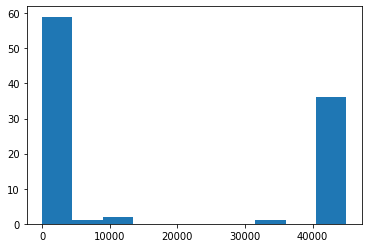

In [14]:
plt.hist(df.epochs)

In [15]:
df = df[df.epochs > 20000]

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 36.]),
 array([32915., 34123., 35331., 36539., 37747., 38955., 40163., 41371.,
        42579., 43787., 44995.]),
 <BarContainer object of 10 artists>)

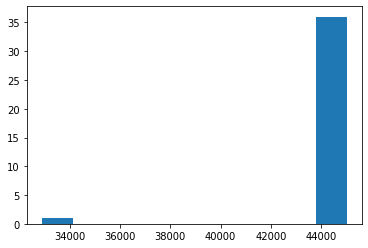

In [16]:
plt.hist(df.epochs)

In [17]:
Counter(df[mode_key])

Counter({'single_model_dec': 3,
         'single_model_rec': 4,
         'ten_features': 4,
         'two_features': 4,
         'single_feature': 4,
         'no_model_id_init': 4,
         'start_from_zero': 3,
         'original': 3,
         'no_rotation': 2,
         'no_relative': 3,
         'no_mask': 3})

In [18]:
modes = sorted(set(df[mode_key]))

In [19]:
def df_bymode(mode):
    return df[df[mode_key] == mode]
def metric_bymode(mode, key):
    return df_bymode(mode)[key]

In [20]:
df.columns

Index(['epochs', 'n_samples', 'losses/opt1/fit/coeff', 'losses/opt1/fit/value',
       'losses/opt1/sparsity/coeff', 'losses/opt1/sparsity/value',
       'losses/opt1/fit_all_on/coeff', 'losses/opt1/fit_all_on/value',
       'losses/opt1/reconstruction/coeff', 'losses/opt1/reconstruction/value',
       ...
       'metrics/context_stats_steps_collected_laps',
       'metrics/context_stats_collect_iters',
       'metrics/context_stats_steps_collected',
       'metrics/context_stats_steps_sampled',
       'metrics/context_stats_collected_sampled_ratio',
       'perf/gpu_util_percent0', 'perf/vram_util_percent0',
       'perf/gpu_util_percent1', 'perf/vram_util_percent1',
       'config/_gin__mode__choice'],
      dtype='object', length=105)

In [21]:
def metric_all_modes(key, agg=None, modes=modes):
    if agg is None:
        agg = lambda x: x 
    res = [metric_bymode(mode, key) for mode in modes]
    res = [agg(x) for x in res]
    return res

In [33]:
modes_blacklist = ['single_feature', 'ten_features', 'two_features', 'no_model_id_init', 'start_from_zero']

In [34]:
def plot_bar(m, modes_blacklist=modes_blacklist):
    if 'sparsity_gap' in m:
        modes_blacklist = modes_blacklist + ['start_from_zero']
    modes_use = [x for x in modes if x not in modes_blacklist]
    means = metric_all_modes(m, np.mean, modes=modes_use)
    stds = metric_all_modes(m, np.std, modes=modes_use)
    if all([means[0] == m for m in means]):
#         print(means[0])
        print(f"Skipping {m} because all means are equal")
        return
    
    fig, ax = plt.subplots(figsize=(15, 8))
    ax.bar(range(len(modes_use)), means, yerr=stds,
           align='center', alpha=0.5, ecolor='black', capsize=10)
    ax.set_title(f"{m} vs. epochs")
    ax.set_xticks(range(len(modes_use)))
    ax.set_xticklabels(modes_use, rotation=90)
    ax.yaxis.grid(True)

    # Save the figure and show
    plt.tight_layout()
    from IPython.display import FileLink, display
    if np.min(means) > 0:
        plt.yscale('log')
    fn = f'bar_ablation_ve2_{m.replace("/", "")}.pdf'
    plt.savefig(fn, bbox_inches='tight')
    display(FileLink(fn))
    plt.show()
#     return fig

In [35]:
# plot_bar('epochs')
plt.rcParams.update({
    #'font.size': 8,
    'text.usetex': False,
    'text.latex.preamble': r'\usepackage{amsfonts}',
    'font.family' : 'normal',
        'font.weight' : 'normal',
        'font.size'   : 20
})


In [36]:
# import matplotlib
# font = {'family' : 'normal',
#         'weight' : 'normal',
#         'size'   : 20}
# matplotlib.rc('font', **font)

/home/sergei/causality-disentanglement-rl/causal_analysis/bar_ablation_ve2_epochs.pdf

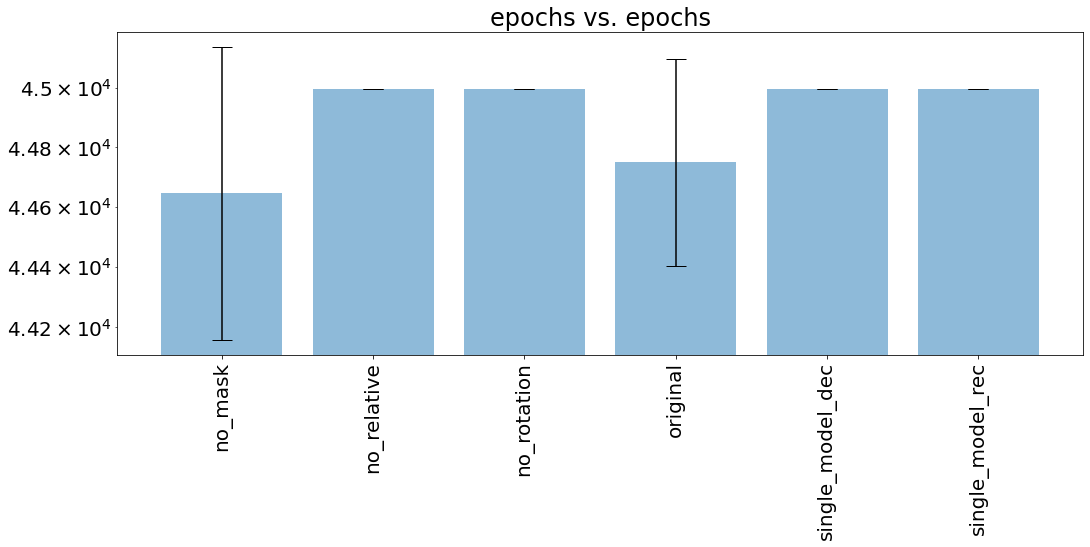

Skipping n_samples because all means are equal
Skipping losses/opt1/fit/coeff because all means are equal


/home/sergei/causality-disentanglement-rl/causal_analysis/bar_ablation_ve2_lossesopt1fitvalue.pdf

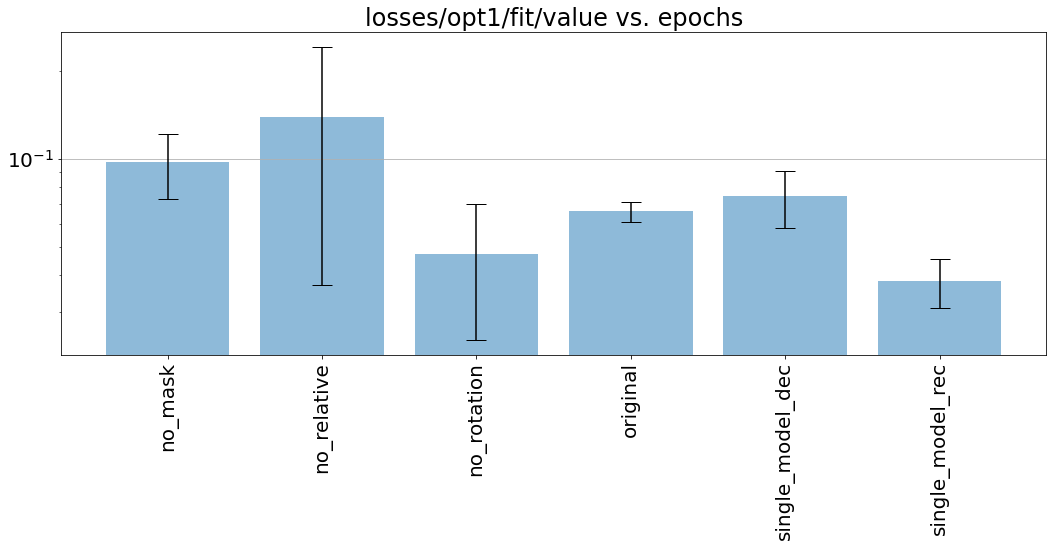

Skipping losses/opt1/sparsity/coeff because all means are equal


/home/sergei/causality-disentanglement-rl/causal_analysis/bar_ablation_ve2_lossesopt1sparsityvalue.pdf

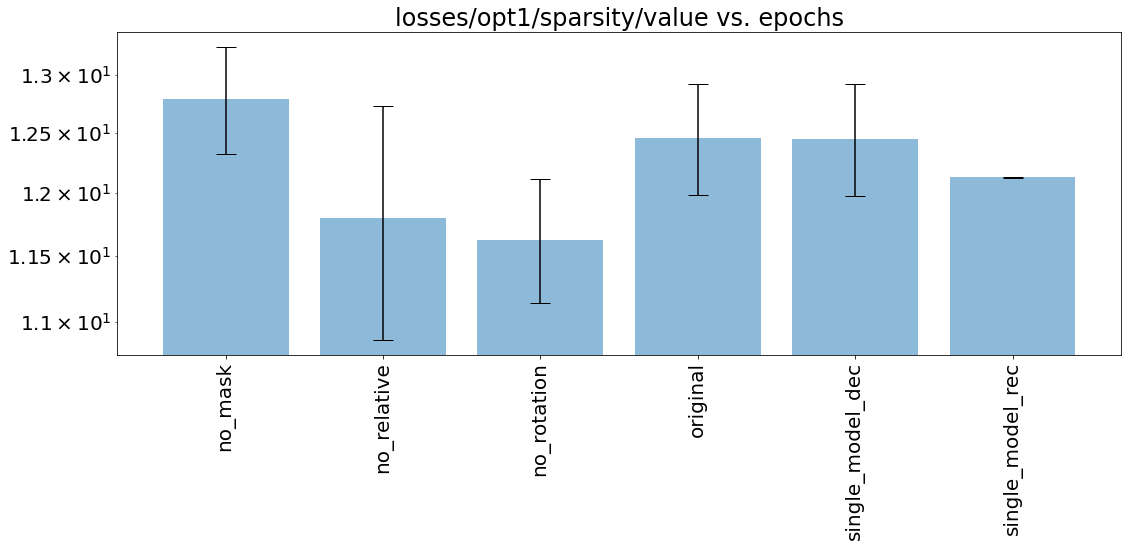

/home/sergei/causality-disentanglement-rl/causal_analysis/bar_ablation_ve2_lossesopt1fit_all_oncoeff.pdf

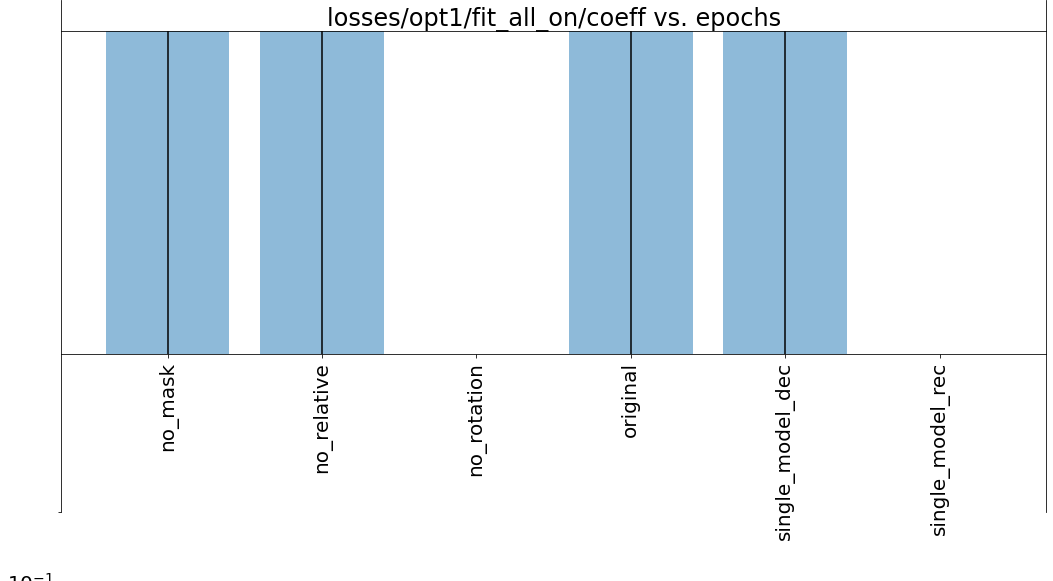

/home/sergei/causality-disentanglement-rl/causal_analysis/bar_ablation_ve2_lossesopt1fit_all_onvalue.pdf

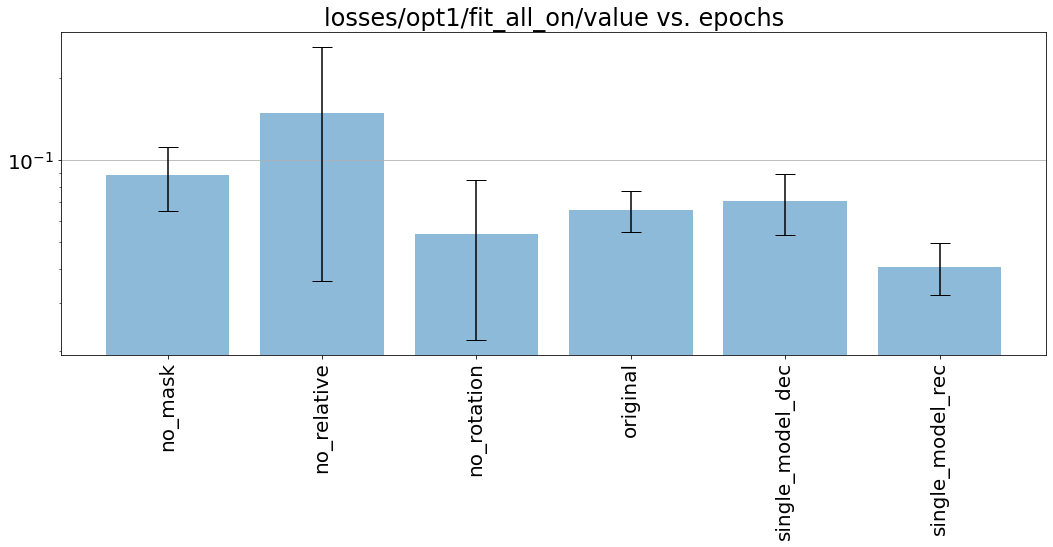

Skipping losses/opt1/reconstruction/coeff because all means are equal


/home/sergei/causality-disentanglement-rl/causal_analysis/bar_ablation_ve2_lossesopt1reconstructionvalue.pdf

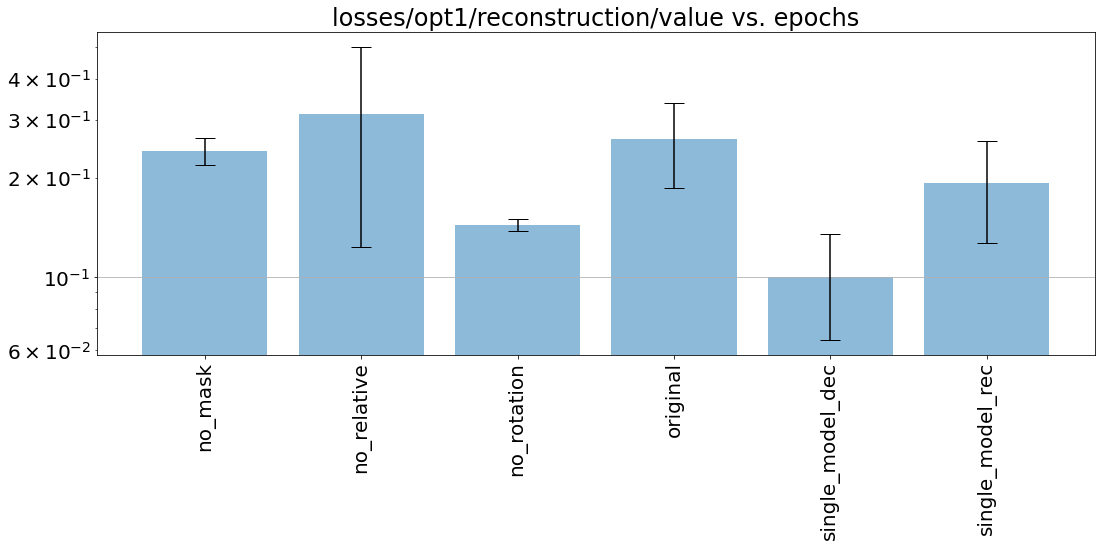

/home/sergei/causality-disentanglement-rl/causal_analysis/bar_ablation_ve2_lossesopt1fit_all_halfcoeff.pdf

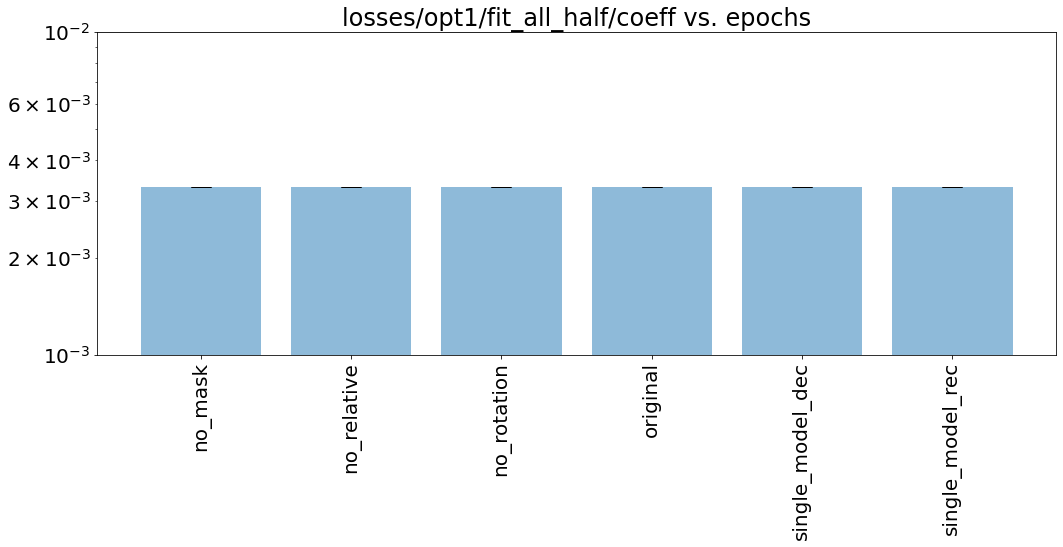

/home/sergei/causality-disentanglement-rl/causal_analysis/bar_ablation_ve2_lossesopt1fit_all_halfvalue.pdf

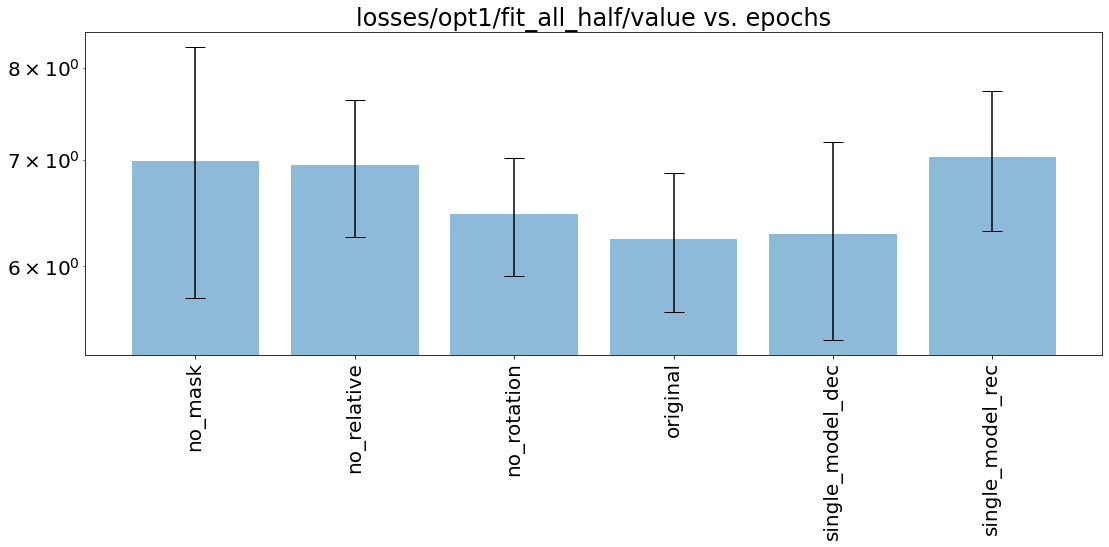

/home/sergei/causality-disentanglement-rl/causal_analysis/bar_ablation_ve2_lossesopt1value.pdf

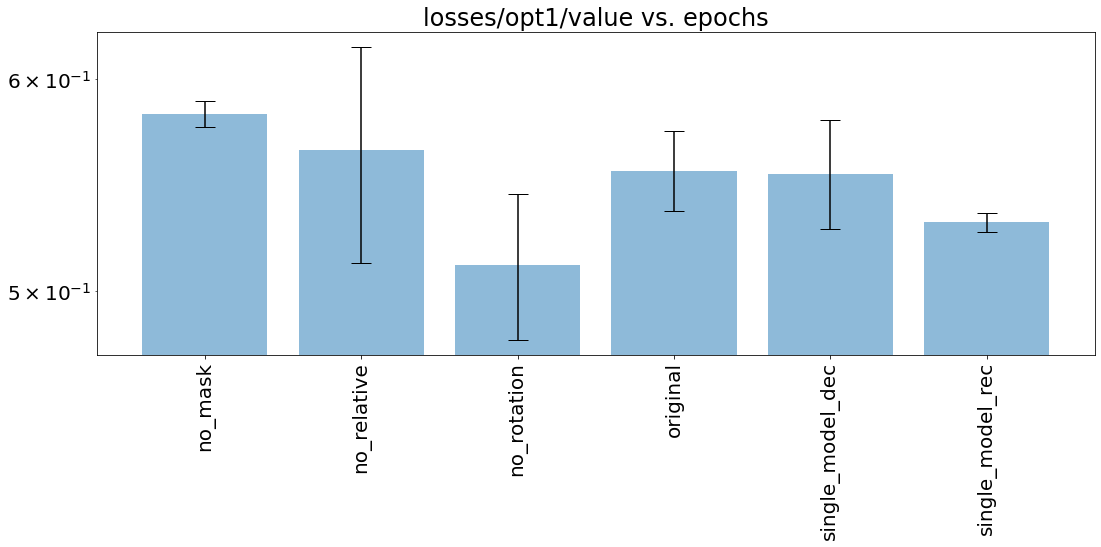

/home/sergei/causality-disentanglement-rl/causal_analysis/bar_ablation_ve2_gradsopt1grad_total_l1mean.pdf

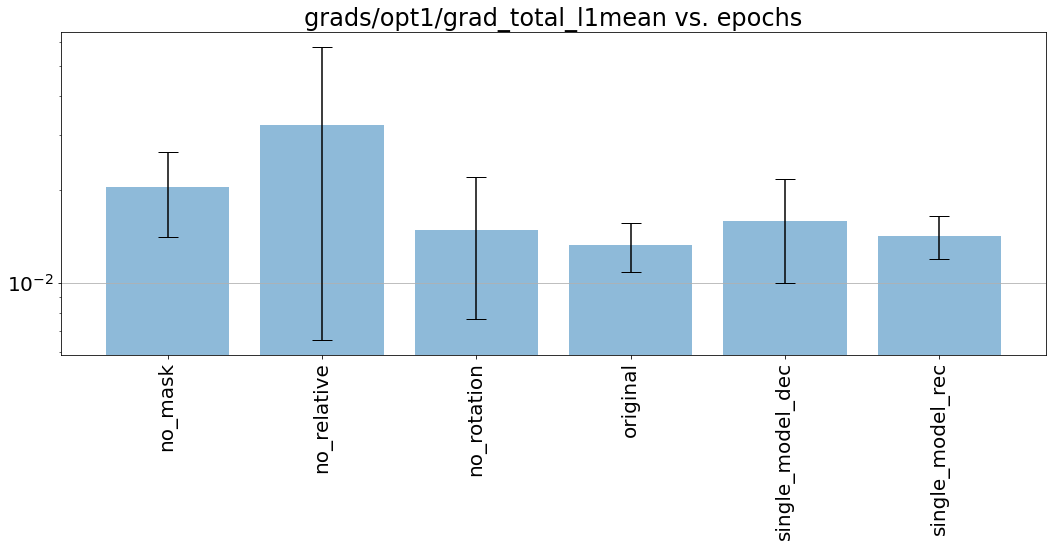

/home/sergei/causality-disentanglement-rl/causal_analysis/bar_ablation_ve2_gradsopt1grad_total_l2sum.pdf

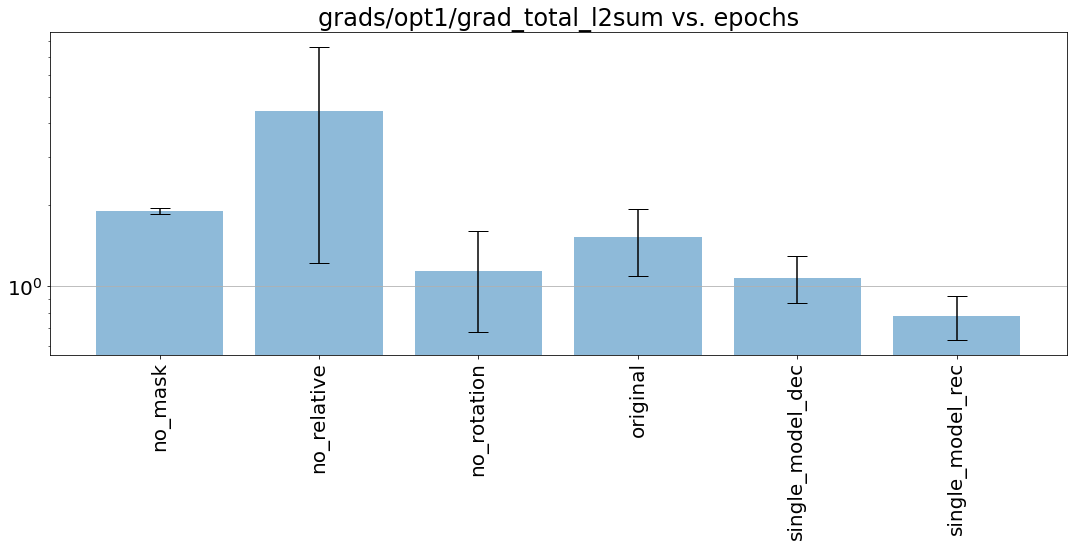

Skipping metrics/batch_index because all means are equal
Skipping metrics/batch_size because all means are equal
Can't plot metrics/fit/mean_feature: Could not convert [-0.59605956 -1.3151183   2.3228498 ][ 1.757496   -0.18628488 -2.40814   ][-1.6096908 -3.9298406 -1.8374248] to numeric
Can't plot metrics/fit/std_feature: Could not convert [8.38468  7.750342 8.065951][5.2408447 5.8977513 4.099836 ][4.796846 9.441784 6.4891  ] to numeric


/home/sergei/causality-disentanglement-rl/causal_analysis/bar_ablation_ve2_metricsfitmin_feature.pdf

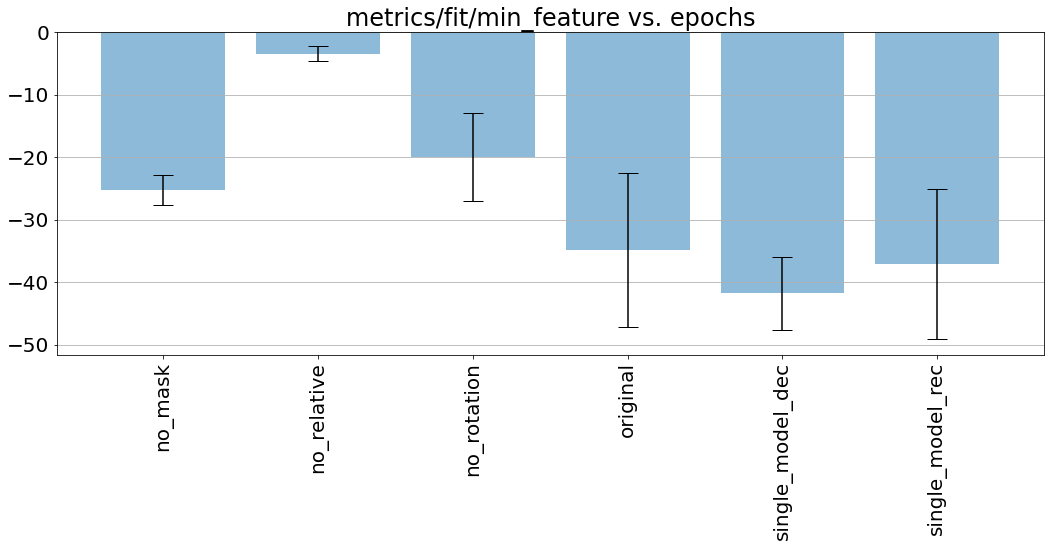

/home/sergei/causality-disentanglement-rl/causal_analysis/bar_ablation_ve2_metricsfitmax_feature.pdf

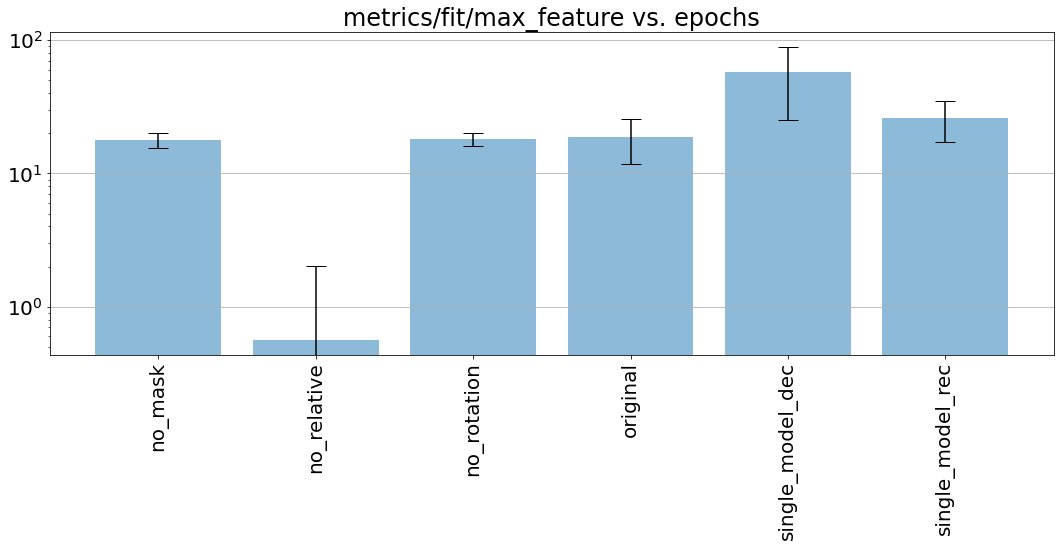

/home/sergei/causality-disentanglement-rl/causal_analysis/bar_ablation_ve2_metricsfitloss_fcons.pdf

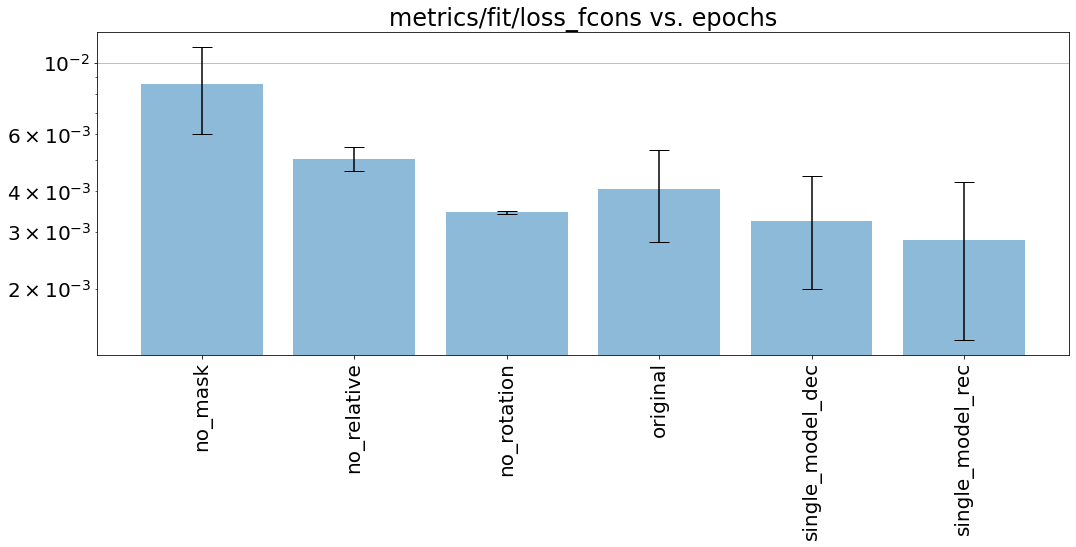

/home/sergei/causality-disentanglement-rl/causal_analysis/bar_ablation_ve2_metricsfitloss_add.pdf

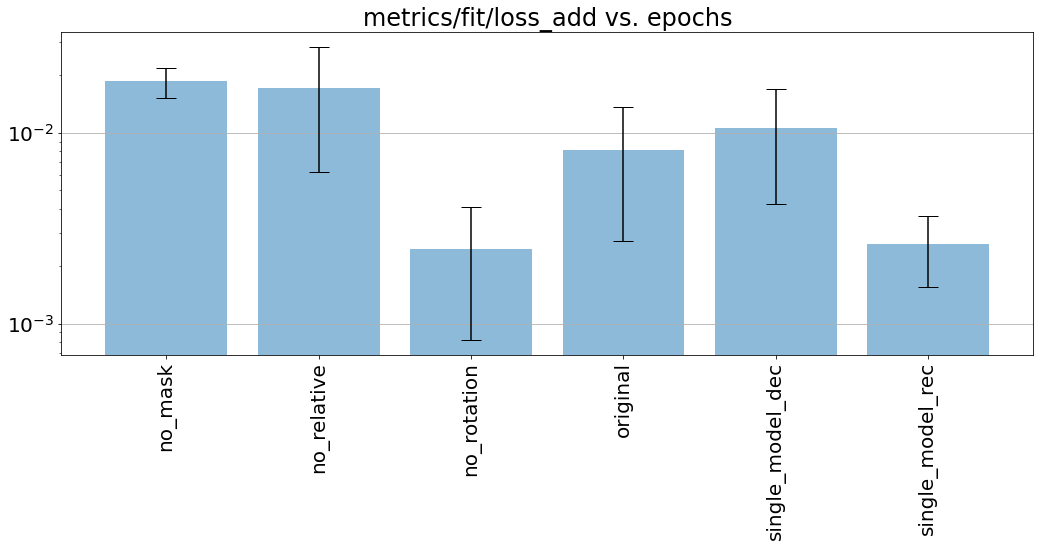

/home/sergei/causality-disentanglement-rl/causal_analysis/bar_ablation_ve2_metricsfitloss_rec.pdf

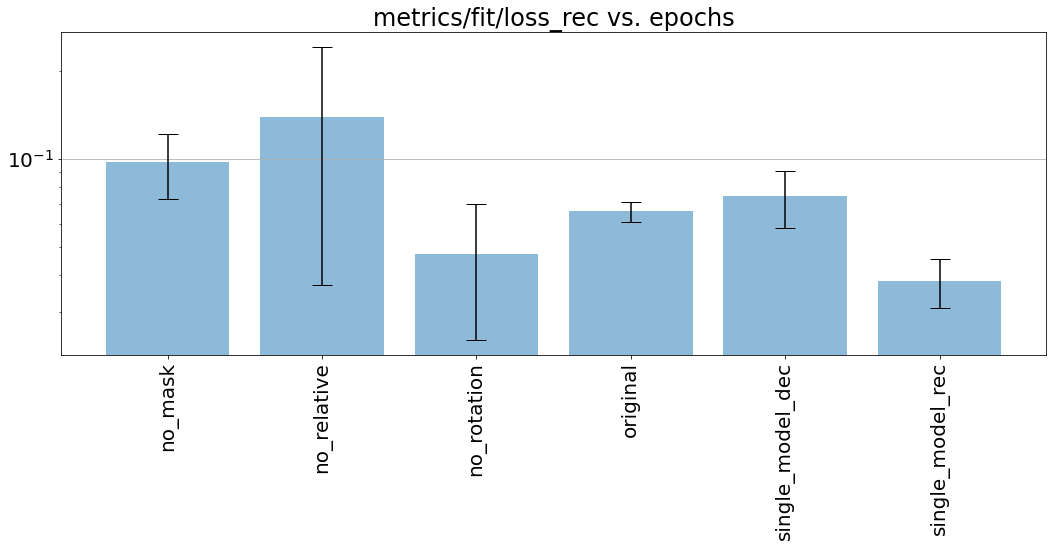

/home/sergei/causality-disentanglement-rl/causal_analysis/bar_ablation_ve2_metricsfitloss_fcons_pre.pdf

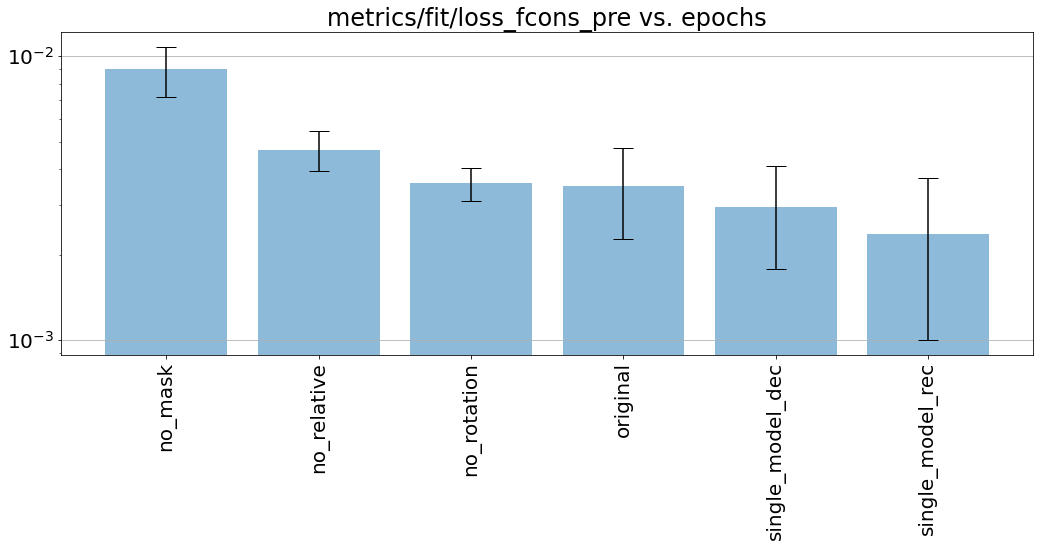

/home/sergei/causality-disentanglement-rl/causal_analysis/bar_ablation_ve2_metricsfitrec_fit_acc_loss_01_agg.pdf

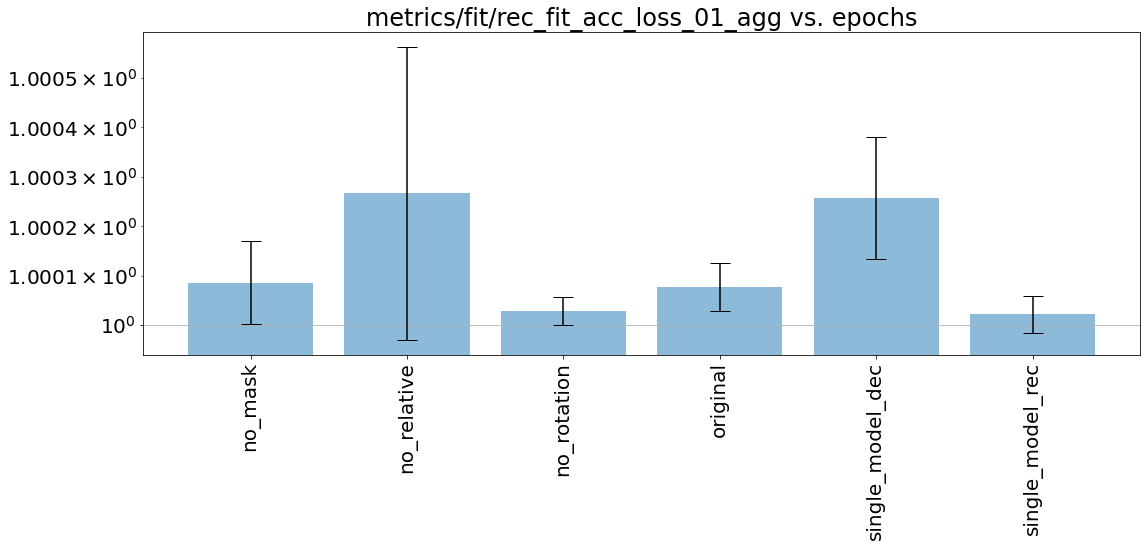

/home/sergei/causality-disentanglement-rl/causal_analysis/bar_ablation_ve2_metricssparsitysparsity_param_0_(5, 5).pdf

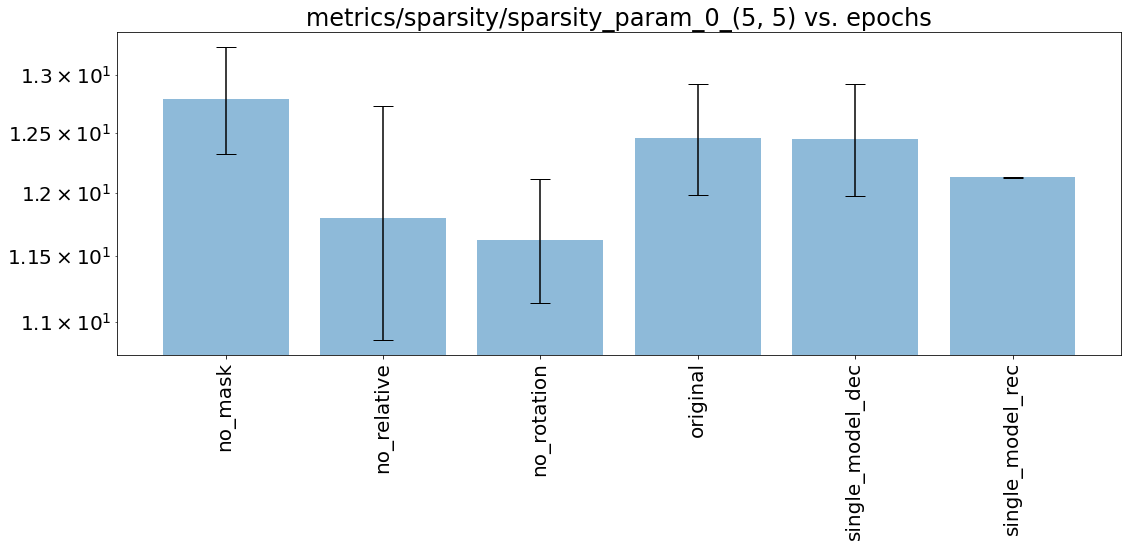

Can't plot metrics/fit_all_on/mean_feature: Could not convert [-0.59605956 -1.3151183   2.3228498 ][ 1.757496   -0.18628488 -2.40814   ][-1.6096908 -3.9298406 -1.8374248] to numeric
Can't plot metrics/fit_all_on/std_feature: Could not convert [8.38468  7.750342 8.065951][5.2408447 5.8977513 4.099836 ][4.796846 9.441784 6.4891  ] to numeric


/home/sergei/causality-disentanglement-rl/causal_analysis/bar_ablation_ve2_metricsfit_all_onmin_feature.pdf

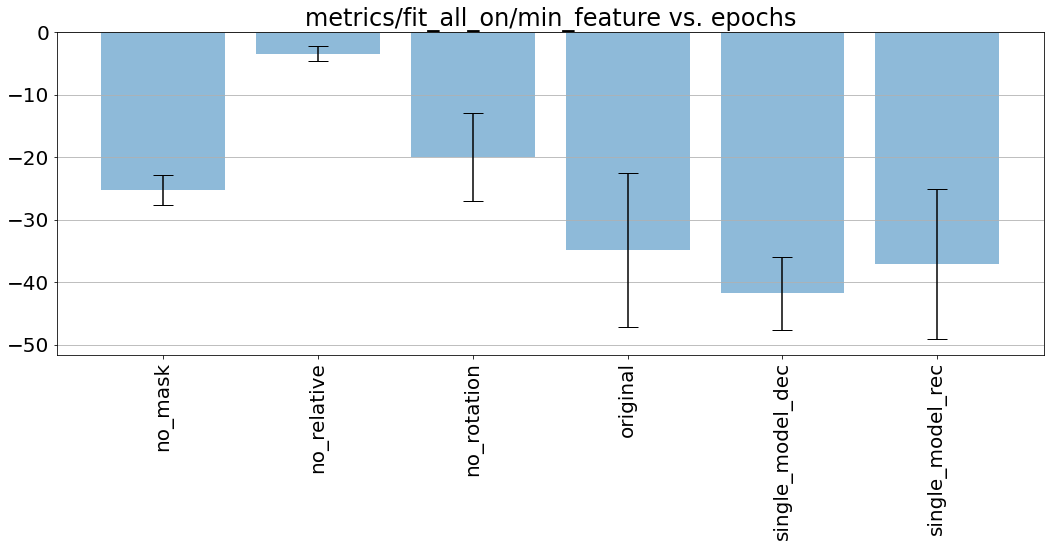

/home/sergei/causality-disentanglement-rl/causal_analysis/bar_ablation_ve2_metricsfit_all_onmax_feature.pdf

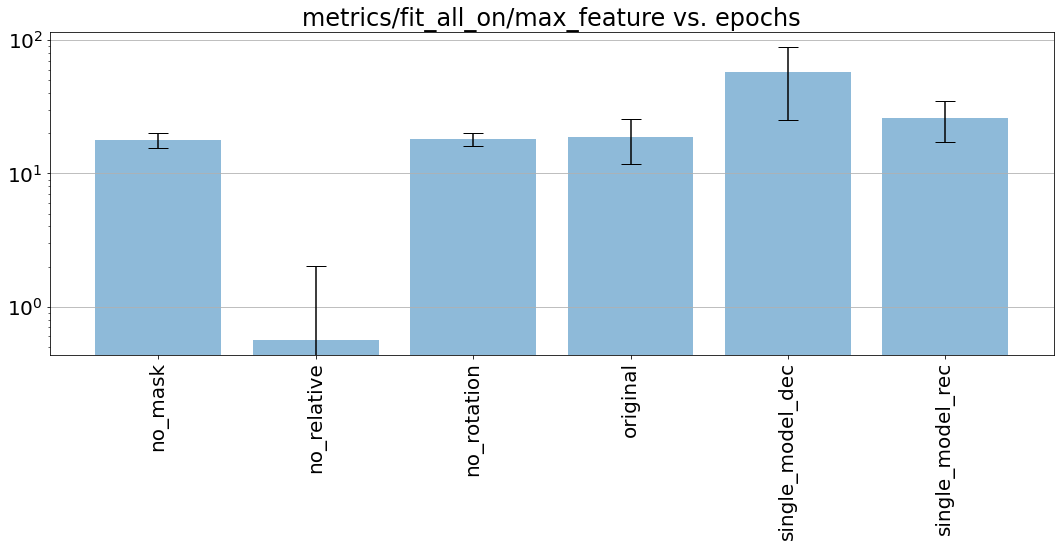

/home/sergei/causality-disentanglement-rl/causal_analysis/bar_ablation_ve2_metricsfit_all_onloss_fcons.pdf

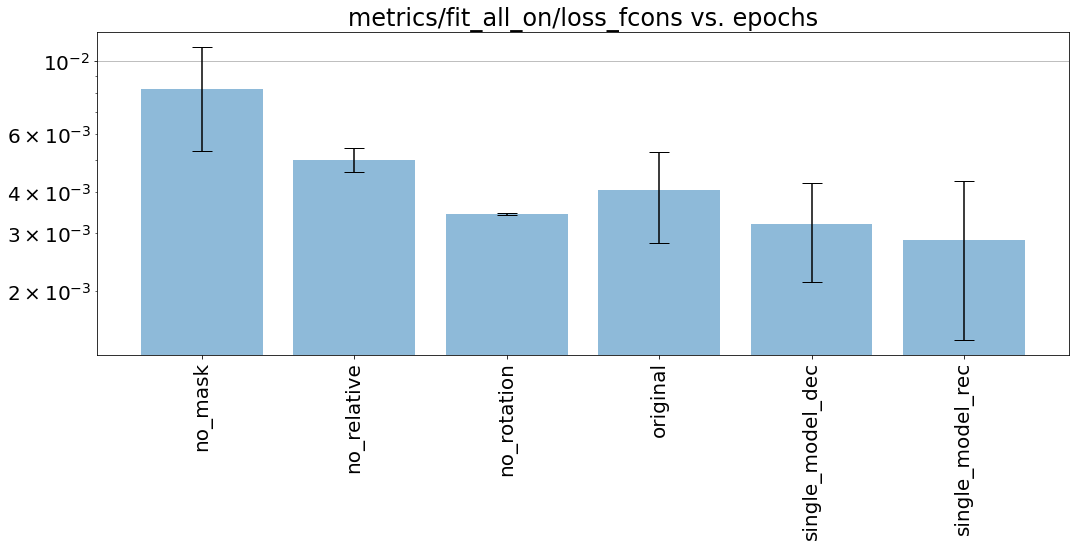

/home/sergei/causality-disentanglement-rl/causal_analysis/bar_ablation_ve2_metricsfit_all_onloss_add.pdf

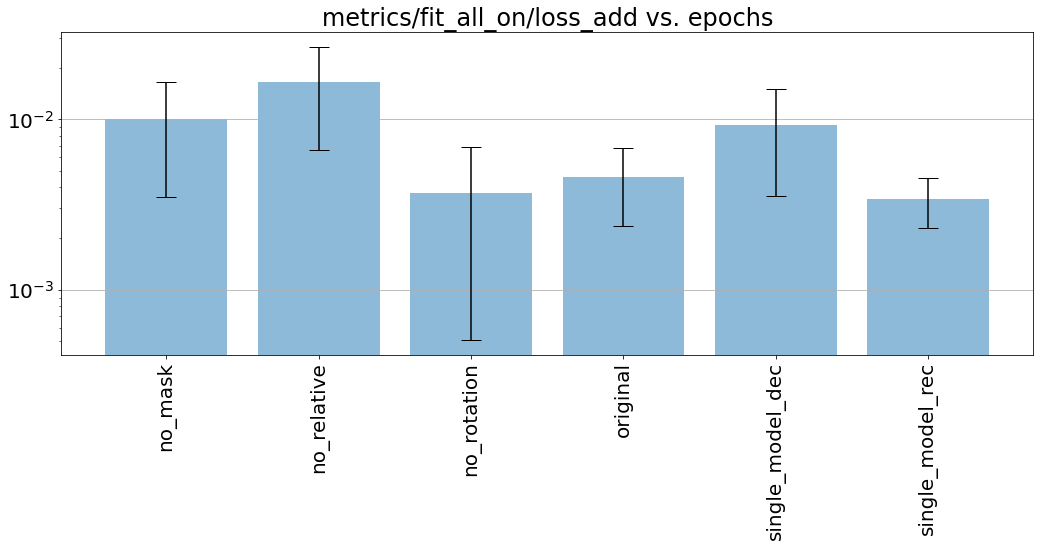

/home/sergei/causality-disentanglement-rl/causal_analysis/bar_ablation_ve2_metricsfit_all_onloss_rec.pdf

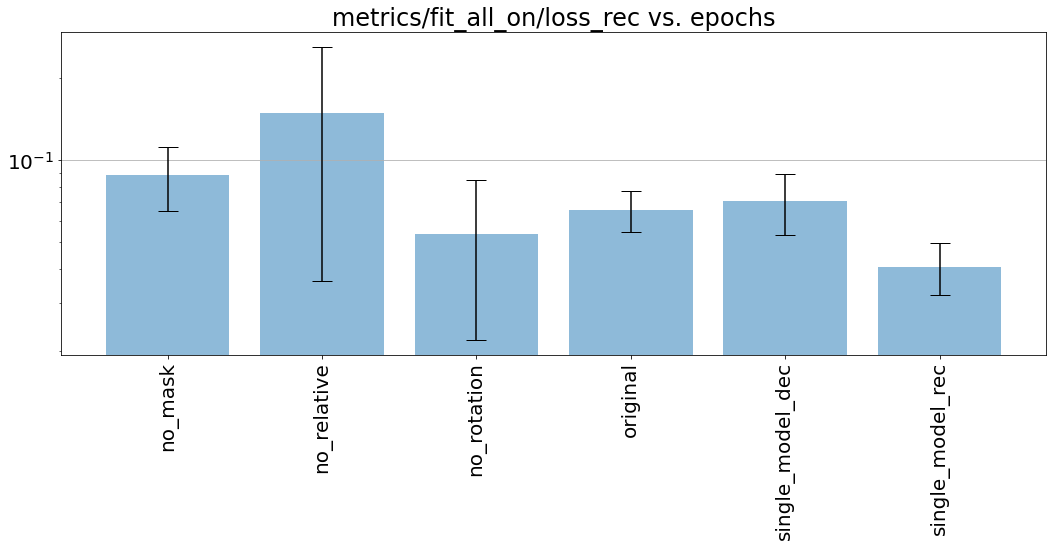

/home/sergei/causality-disentanglement-rl/causal_analysis/bar_ablation_ve2_metricsfit_all_onloss_fcons_pre.pdf

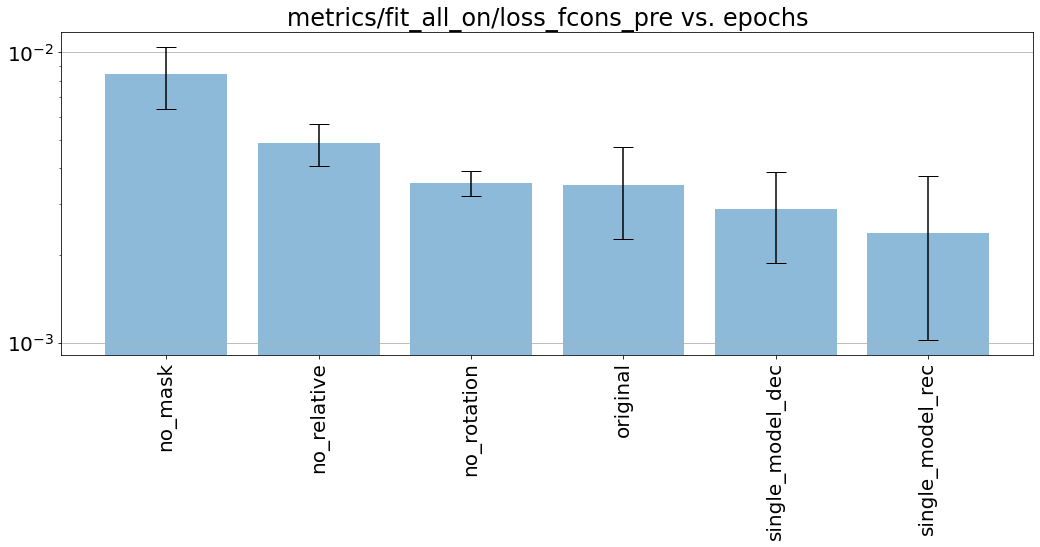

/home/sergei/causality-disentanglement-rl/causal_analysis/bar_ablation_ve2_metricsfit_all_onrec_fit_acc_loss_01_agg.pdf

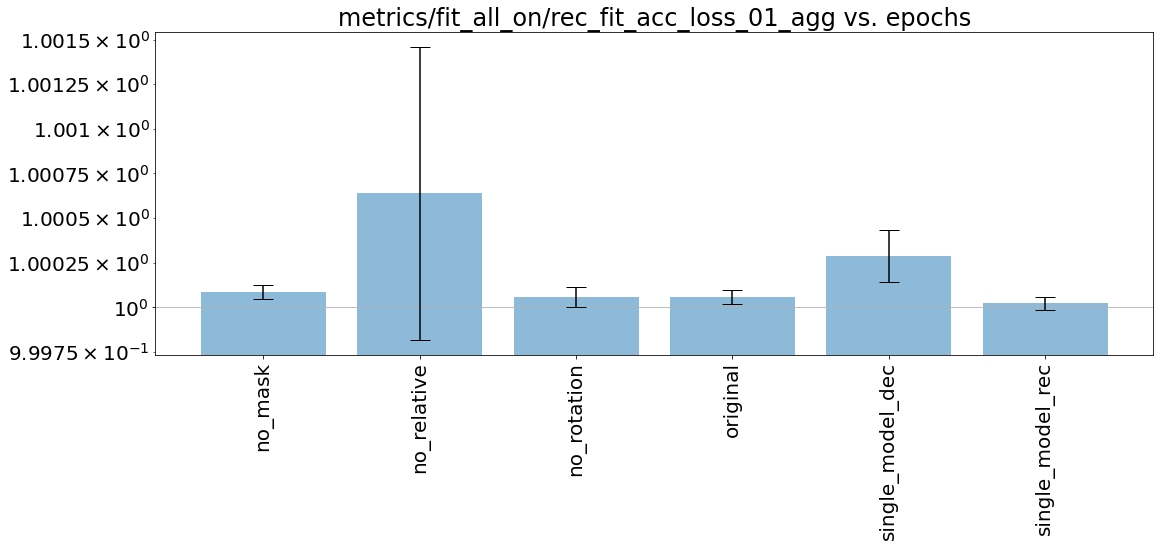

/home/sergei/causality-disentanglement-rl/causal_analysis/bar_ablation_ve2_metricsreconstructionrec_acc_loss_01_agg.pdf

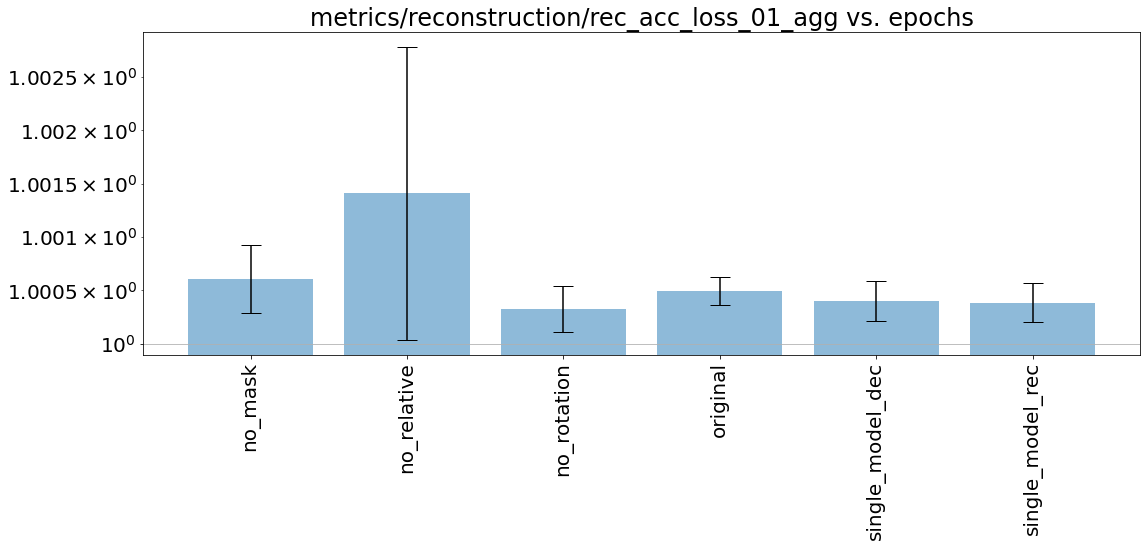

Can't plot metrics/fit_all_half/mean_feature: Could not convert [-0.59605956 -1.3151183   2.3228498 ][ 1.757496   -0.18628488 -2.40814   ][-1.6096908 -3.9298406 -1.8374248] to numeric
Can't plot metrics/fit_all_half/std_feature: Could not convert [8.38468  7.750342 8.065951][5.2408447 5.8977513 4.099836 ][4.796846 9.441784 6.4891  ] to numeric


/home/sergei/causality-disentanglement-rl/causal_analysis/bar_ablation_ve2_metricsfit_all_halfmin_feature.pdf

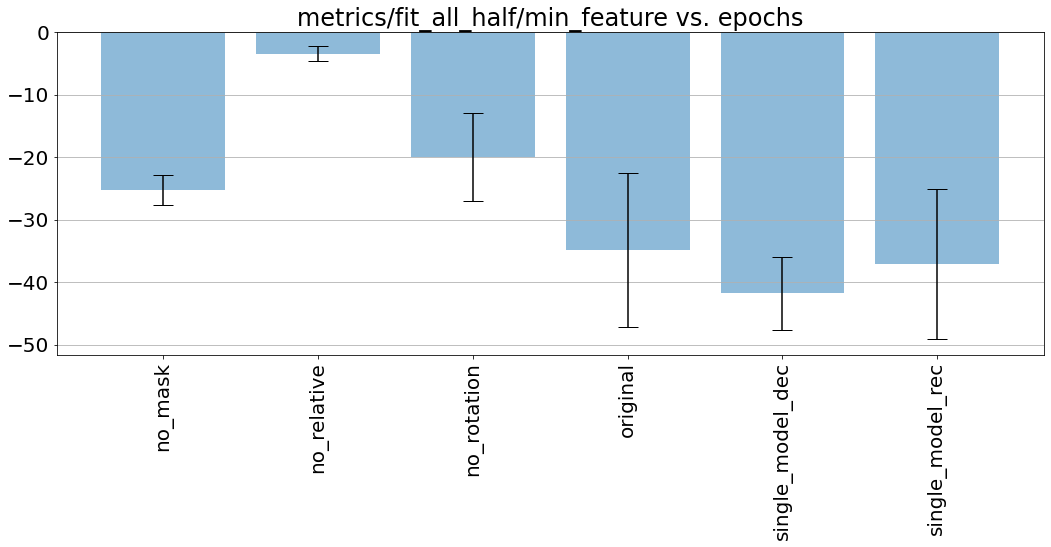

/home/sergei/causality-disentanglement-rl/causal_analysis/bar_ablation_ve2_metricsfit_all_halfmax_feature.pdf

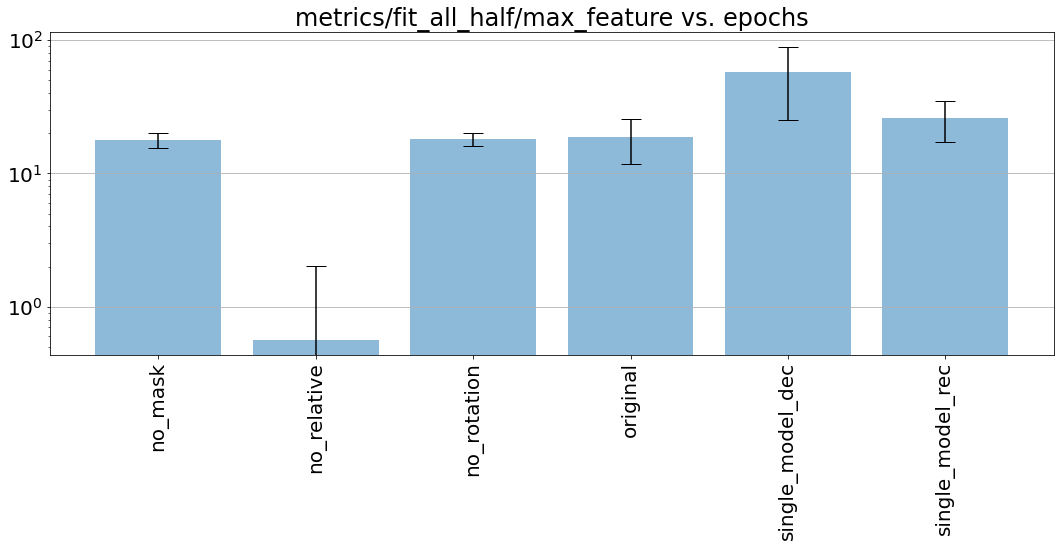

/home/sergei/causality-disentanglement-rl/causal_analysis/bar_ablation_ve2_metricsfit_all_halfloss_fcons.pdf

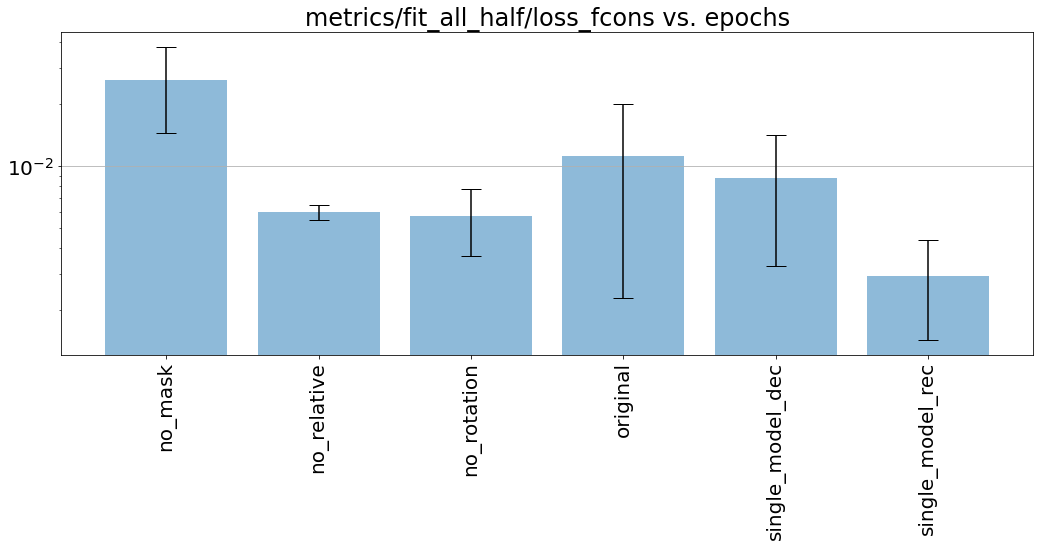

/home/sergei/causality-disentanglement-rl/causal_analysis/bar_ablation_ve2_metricsfit_all_halfloss_add.pdf

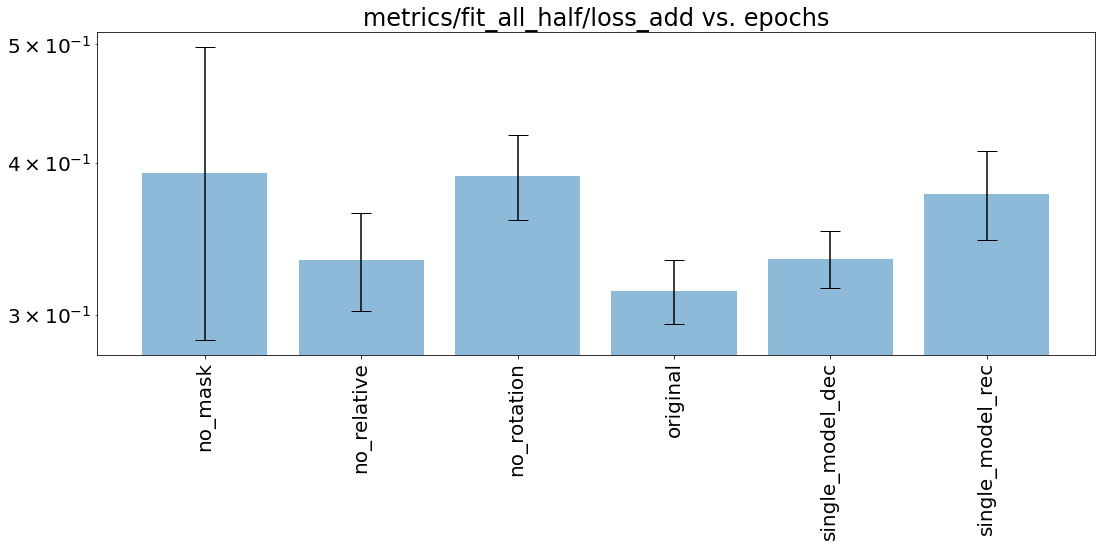

/home/sergei/causality-disentanglement-rl/causal_analysis/bar_ablation_ve2_metricsfit_all_halfloss_rec.pdf

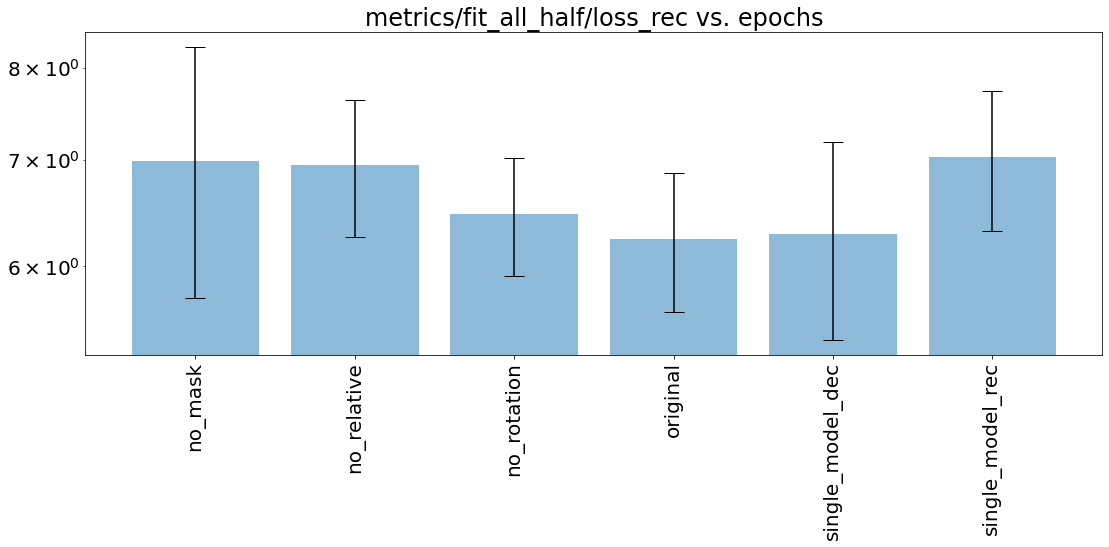

/home/sergei/causality-disentanglement-rl/causal_analysis/bar_ablation_ve2_metricsfit_all_halfloss_fcons_pre.pdf

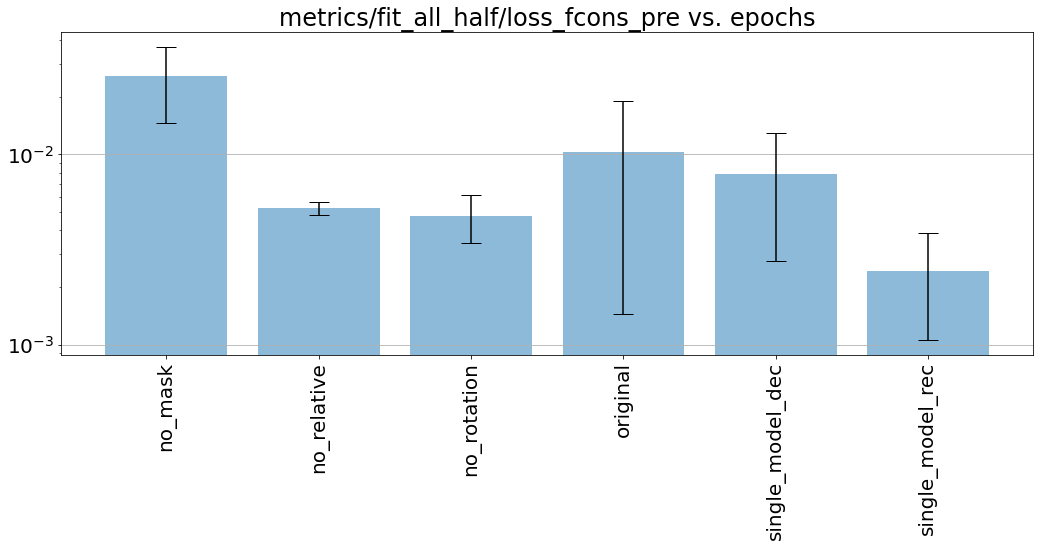

/home/sergei/causality-disentanglement-rl/causal_analysis/bar_ablation_ve2_metricsfit_all_halfrec_fit_acc_loss_01_agg.pdf

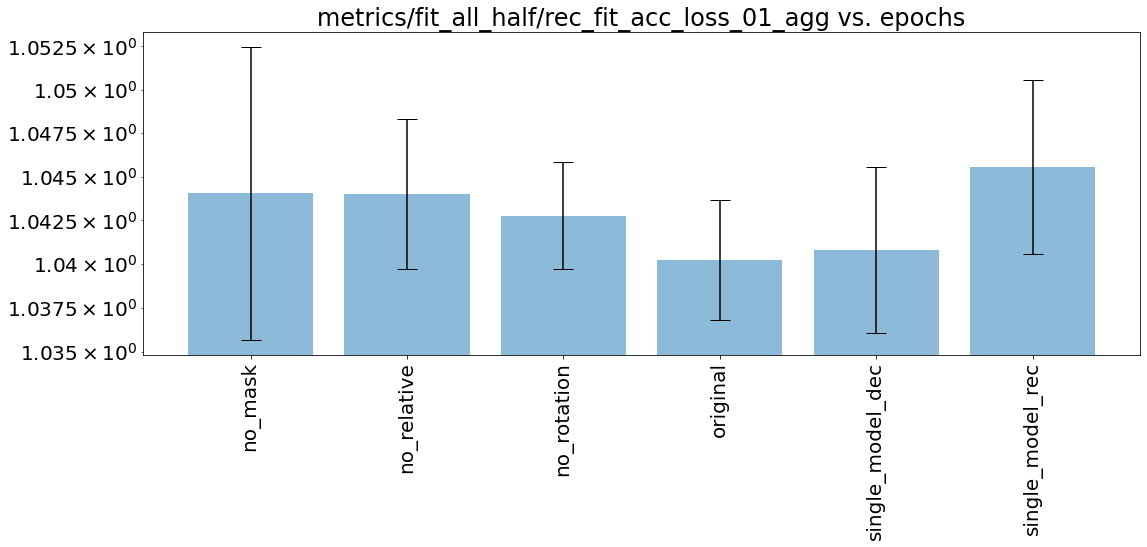

/home/sergei/causality-disentanglement-rl/causal_analysis/bar_ablation_ve2_metricsepisode_reward.pdf

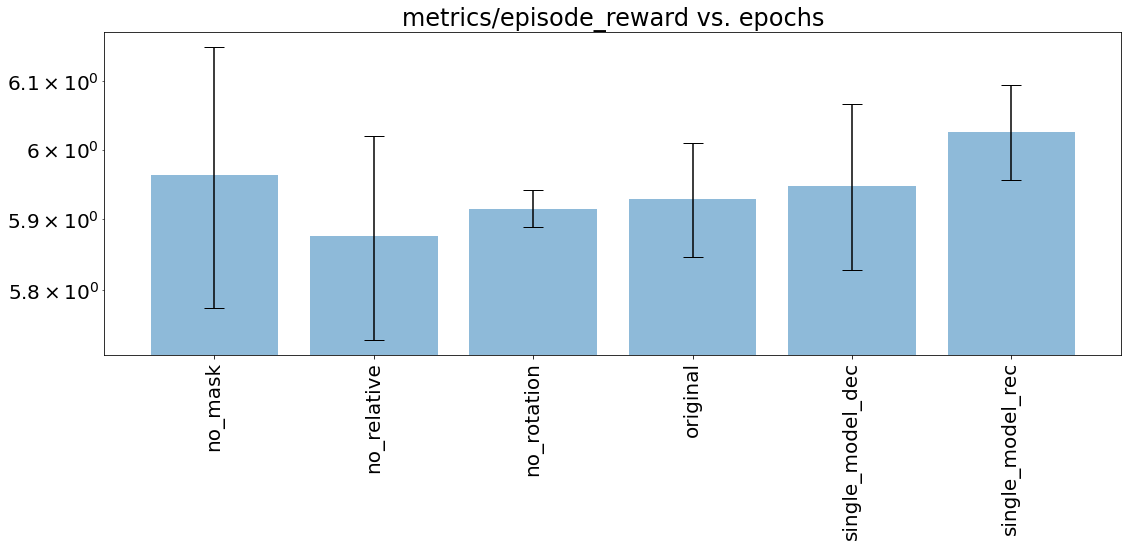

/home/sergei/causality-disentanglement-rl/causal_analysis/bar_ablation_ve2_metricsfit_loss_smooth.pdf

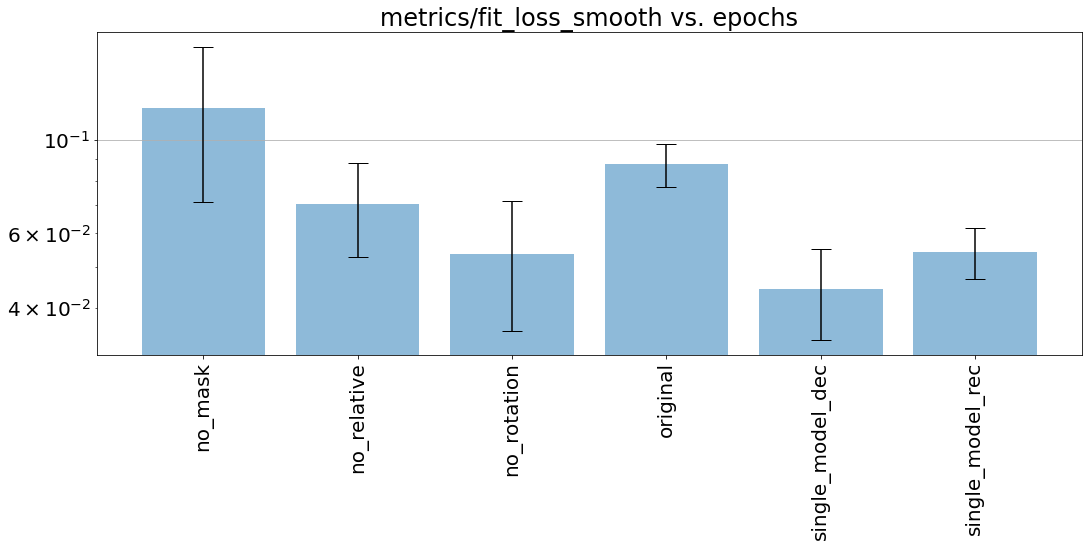

Can't plot metrics/graph_entropy_ma: Could not convert [0.05365639 0.00285822 0.00102118 0.05376189 0.00102118 0.05341735
 0.05413452 0.00102118 0.05384818 0.05432393][0.00102118 0.0519915  0.00102118 0.05283703 0.05298171 0.00102118
 0.00449285 0.05191896 0.05297755 0.05402894][0.05316588 0.00102118 0.0542292  0.00102118 0.00102118 0.05379284
 0.05462372 0.00689154 0.05433264 0.05425366] to numeric
Can't plot metrics/graph_entropy_mf: Could not convert [0.00102118 0.05419331 0.0538136  0.05306692 0.00102118 0.05230352
 0.05380138 0.05373335 0.00102118 0.00102118 0.01144466 0.00238748
 0.00622345 0.05406253 0.00102118][0.00102118 0.05259564 0.05250731 0.05334636 0.00102118 0.05364584
 0.05345982 0.05270339 0.00102118 0.00490681 0.00102118 0.00102118
 0.01264247 0.02754666 0.00102118][0.00102118 0.05178216 0.05354968 0.05481362 0.00102118 0.0515993
 0.05434202 0.05381079 0.00102118 0.00102118 0.00246513 0.00823988
 0.0181902  0.01666722 0.01311179] to numeric


/home/sergei/causality-disentanglement-rl/causal_analysis/bar_ablation_ve2_metricsmax_element_ma.pdf

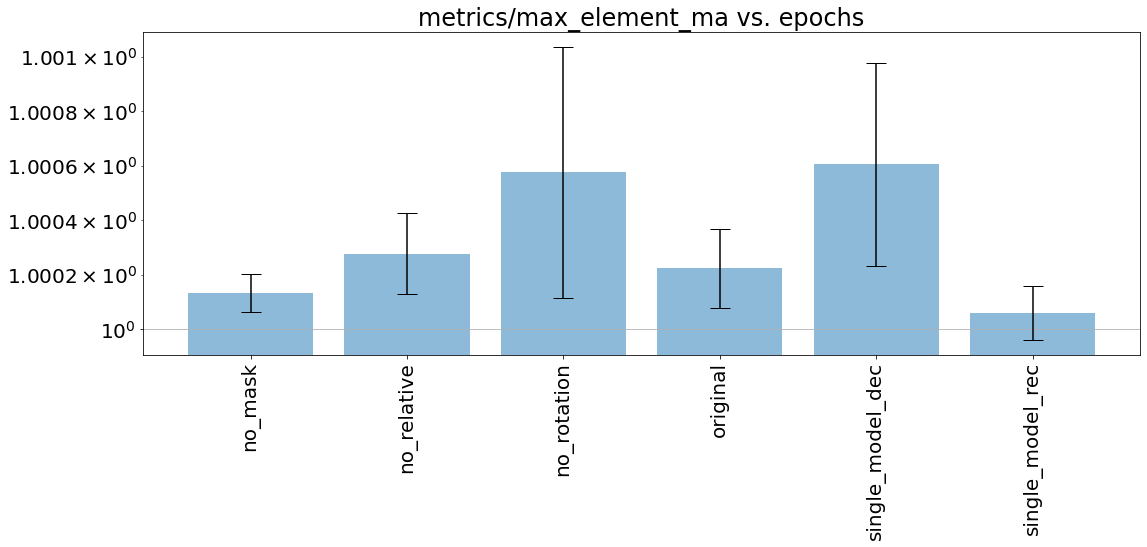

/home/sergei/causality-disentanglement-rl/causal_analysis/bar_ablation_ve2_metricsmax_element_mf.pdf

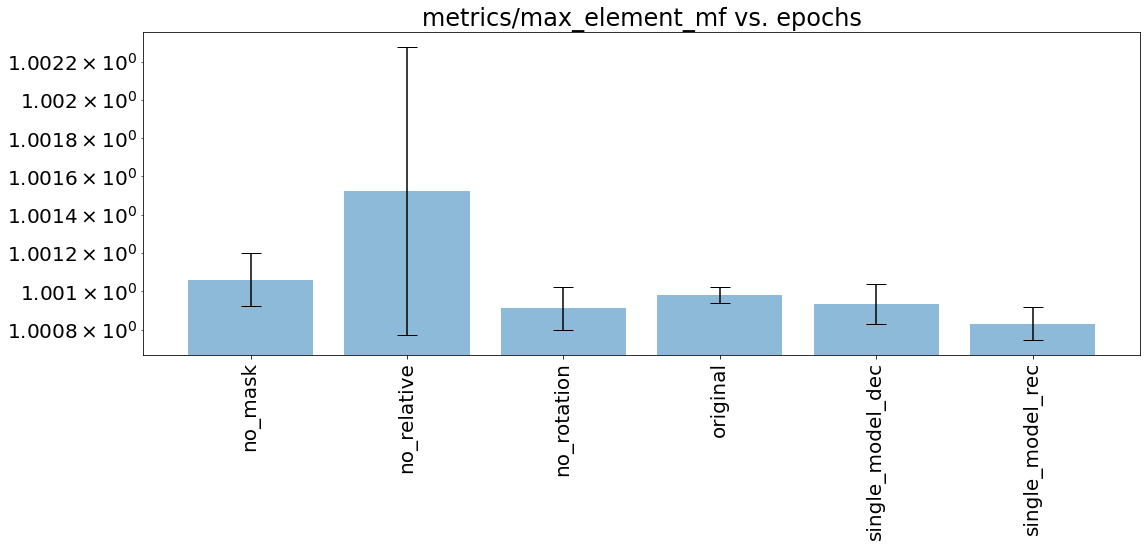

/home/sergei/causality-disentanglement-rl/causal_analysis/bar_ablation_ve2_metricsnnz.pdf

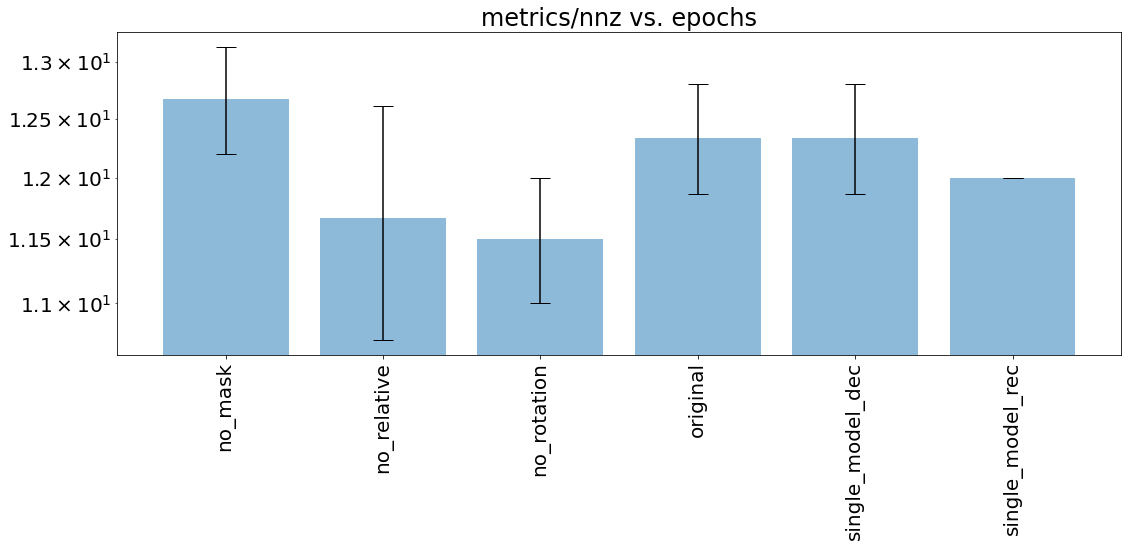

/home/sergei/causality-disentanglement-rl/causal_analysis/bar_ablation_ve2_metricsnon_sparse_fit_loss_smooth.pdf

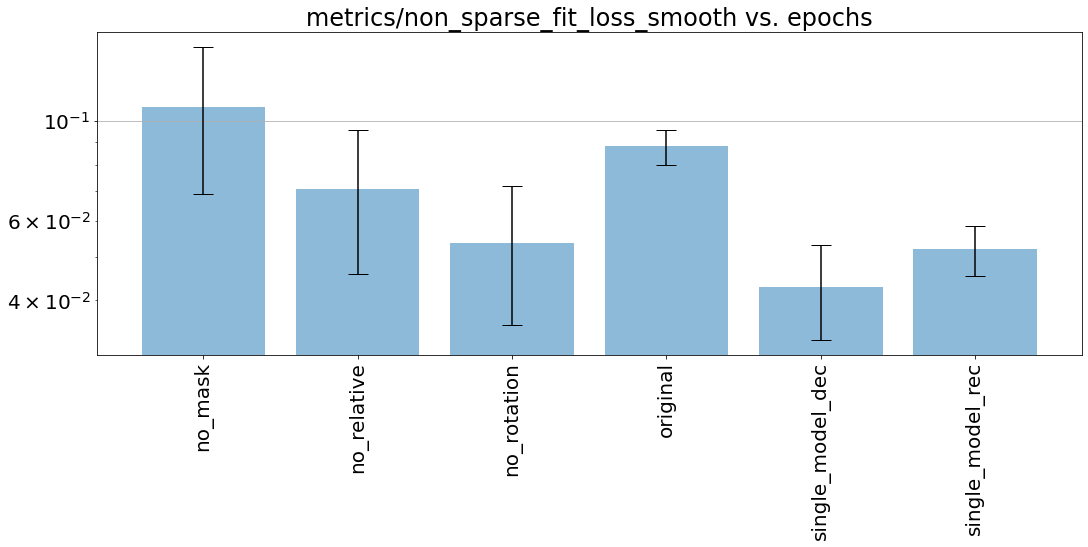

/home/sergei/causality-disentanglement-rl/causal_analysis/bar_ablation_ve2_metricsthreshold_action.pdf

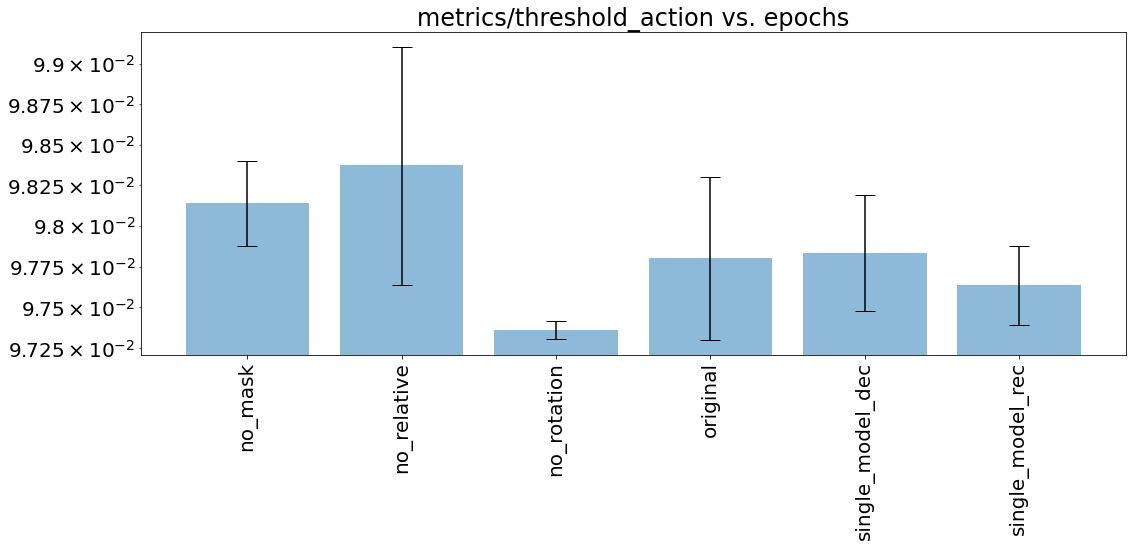

Skipping metrics/threshold_annealer_threshold because all means are equal


/home/sergei/causality-disentanglement-rl/causal_analysis/bar_ablation_ve2_metricsthreshold_features.pdf

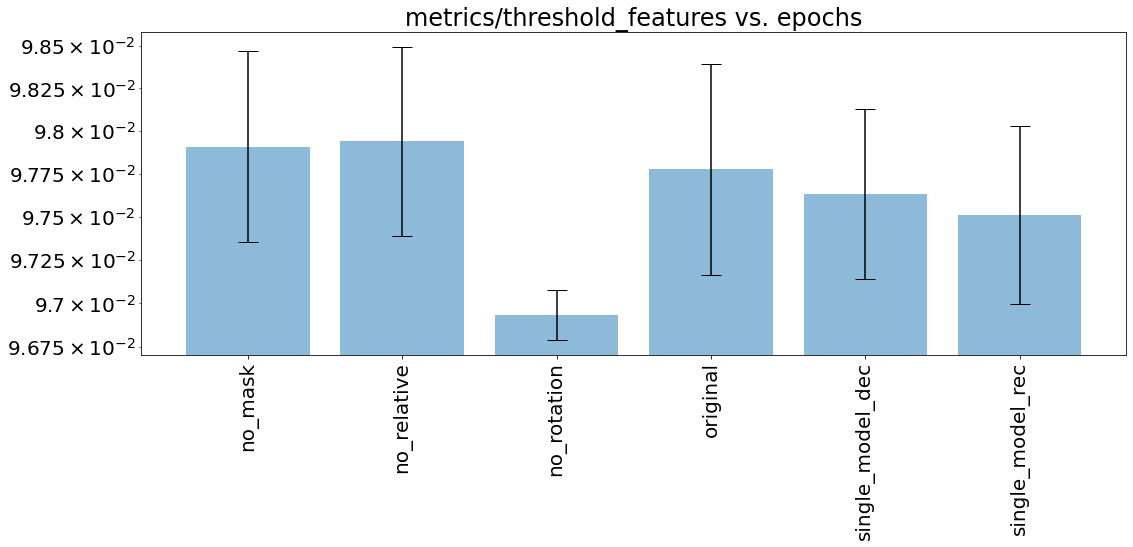

/home/sergei/causality-disentanglement-rl/causal_analysis/bar_ablation_ve2_metrics|last_add_sparsity_gap.pdf

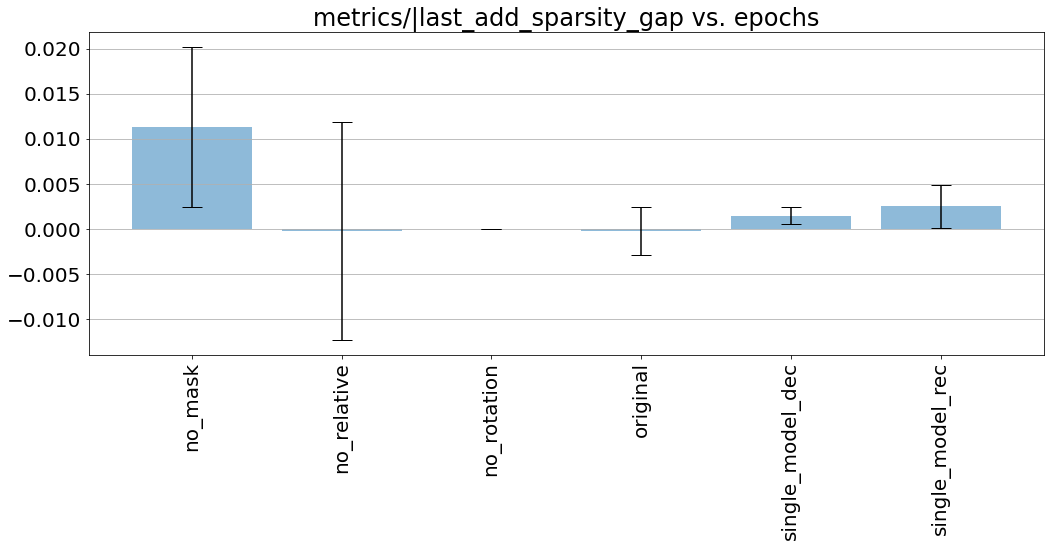

/home/sergei/causality-disentanglement-rl/causal_analysis/bar_ablation_ve2_metrics|last_mult_sparsity_gap.pdf

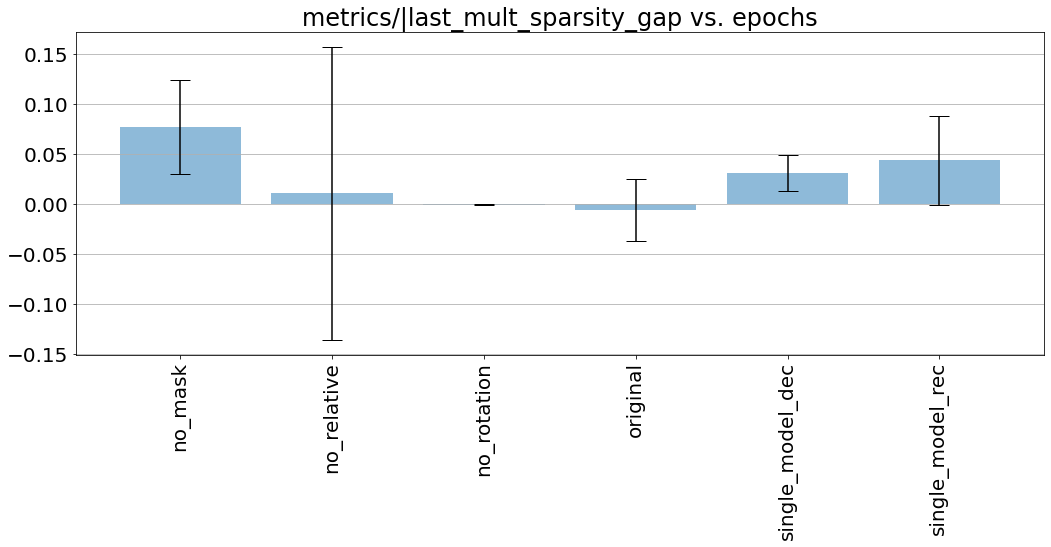

/home/sergei/.local/lib/python3.7/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


/home/sergei/causality-disentanglement-rl/causal_analysis/bar_ablation_ve2_CausalModel.pdf

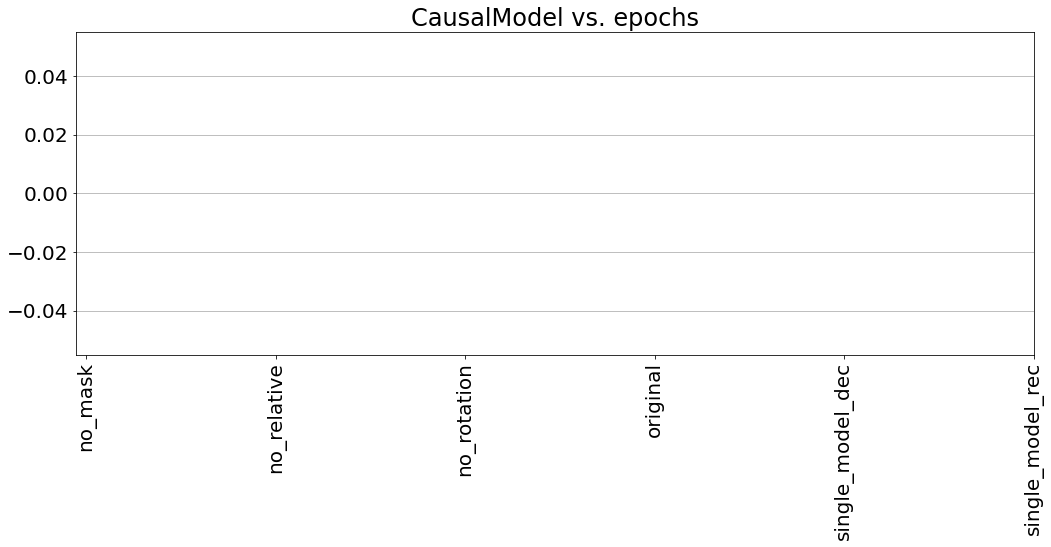

/home/sergei/.local/lib/python3.7/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


/home/sergei/causality-disentanglement-rl/causal_analysis/bar_ablation_ve2_threshold_learner_feature.pdf

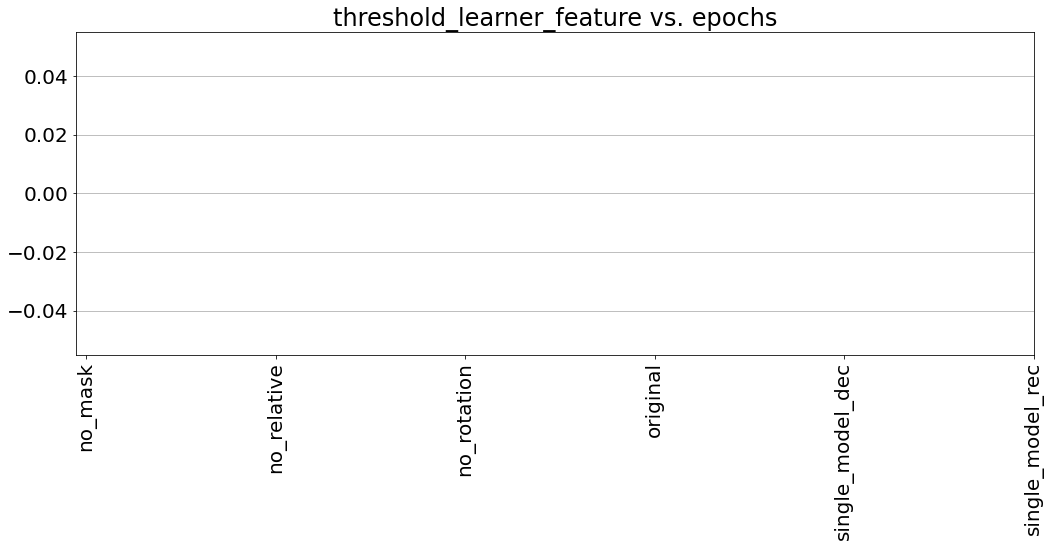

/home/sergei/.local/lib/python3.7/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


/home/sergei/causality-disentanglement-rl/causal_analysis/bar_ablation_ve2_model.pdf

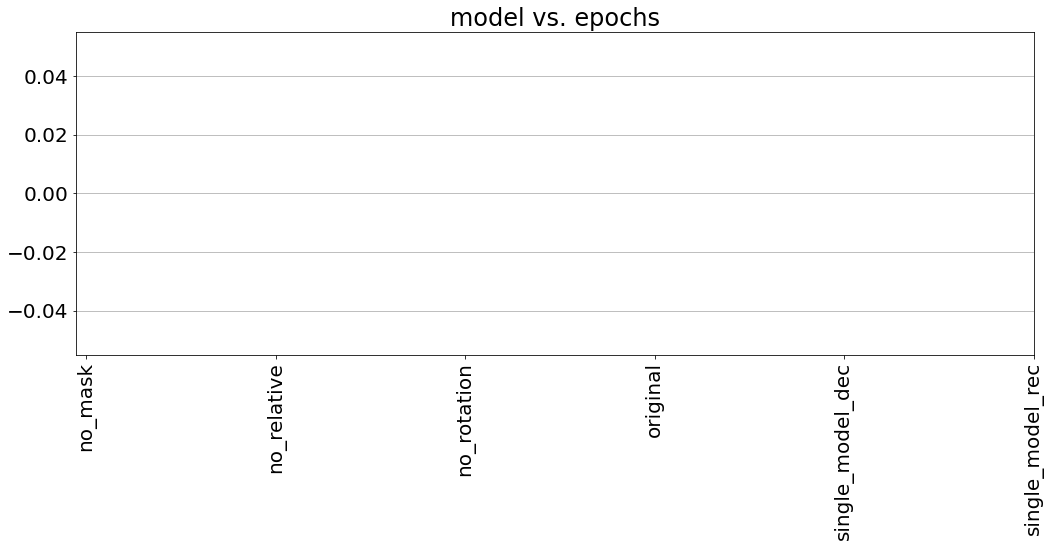

/home/sergei/.local/lib/python3.7/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


/home/sergei/causality-disentanglement-rl/causal_analysis/bar_ablation_ve2_checkpoint_tune.pdf

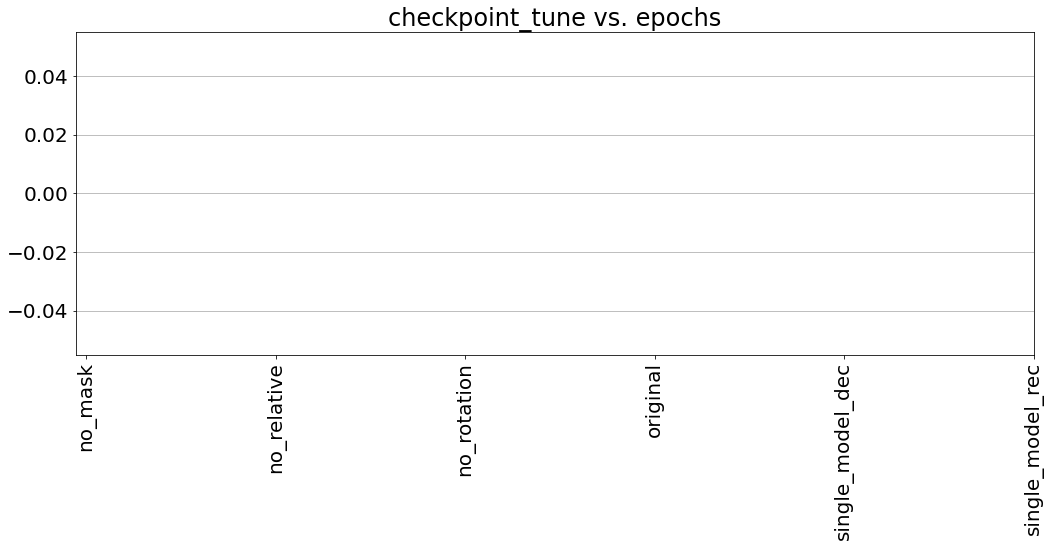

/home/sergei/.local/lib/python3.7/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


/home/sergei/causality-disentanglement-rl/causal_analysis/bar_ablation_ve2_checkpoint_size.pdf

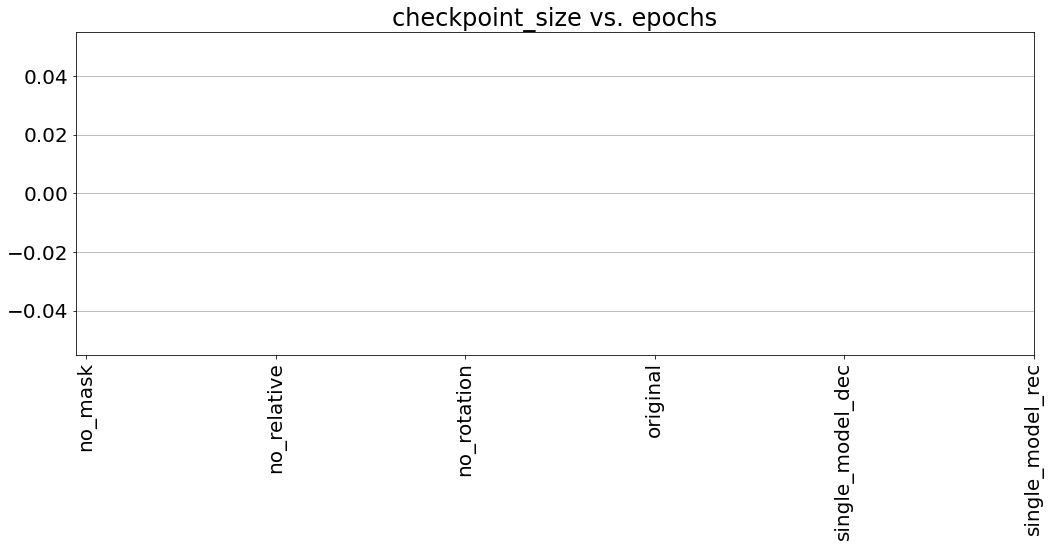

/home/sergei/causality-disentanglement-rl/causal_analysis/bar_ablation_ve2_time_this_iter_s.pdf

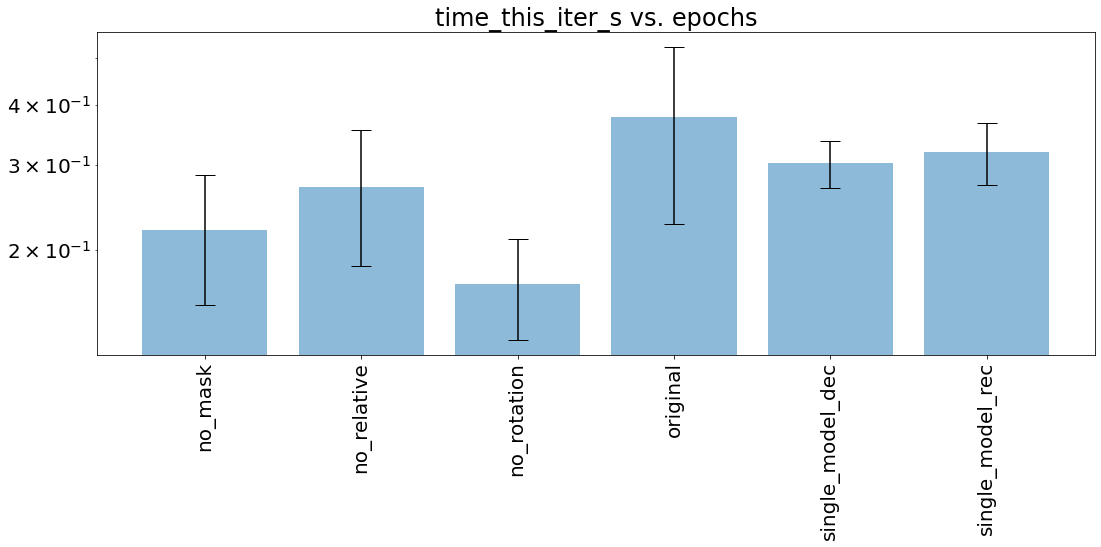

/home/sergei/.local/lib/python3.7/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


/home/sergei/causality-disentanglement-rl/causal_analysis/bar_ablation_ve2_should_checkpoint.pdf

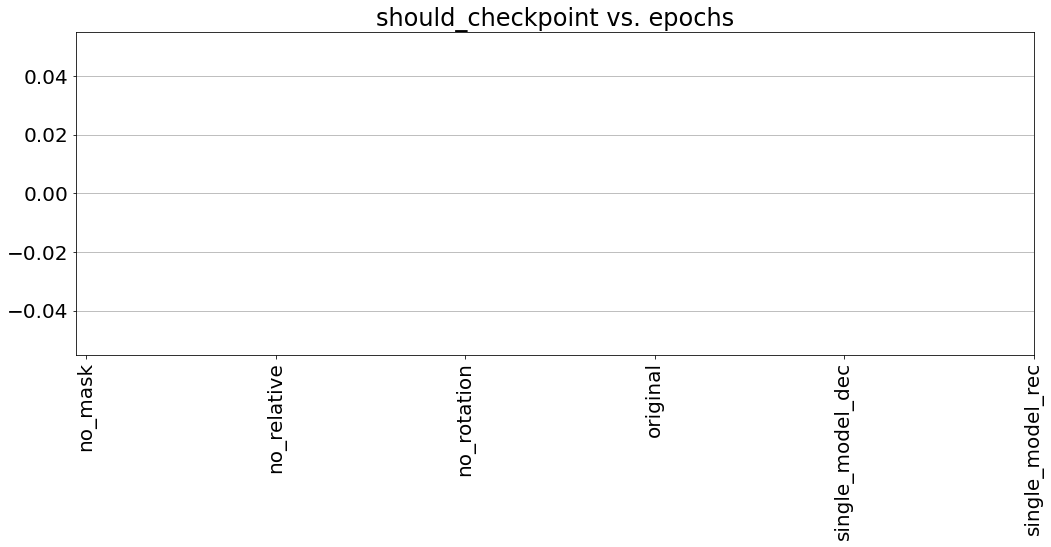

Skipping done because all means are equal


/home/sergei/.local/lib/python3.7/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


/home/sergei/causality-disentanglement-rl/causal_analysis/bar_ablation_ve2_timesteps_total.pdf

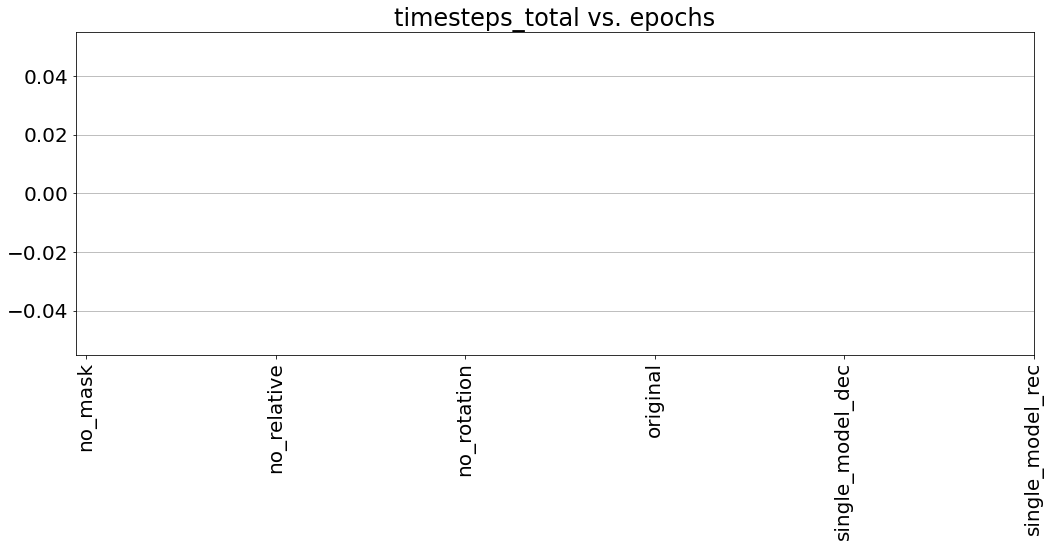

/home/sergei/.local/lib/python3.7/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


/home/sergei/causality-disentanglement-rl/causal_analysis/bar_ablation_ve2_episodes_total.pdf

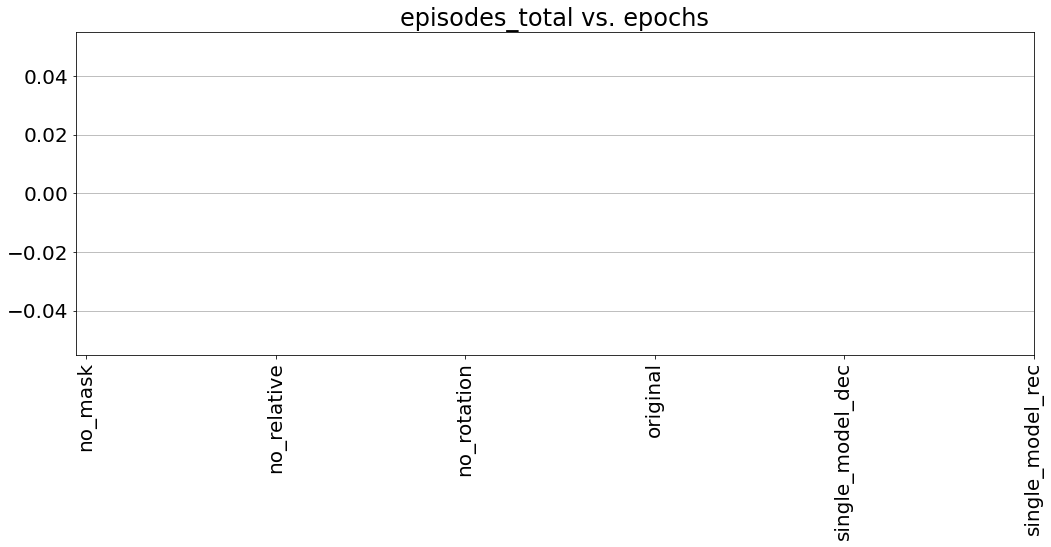

/home/sergei/causality-disentanglement-rl/causal_analysis/bar_ablation_ve2_training_iteration.pdf

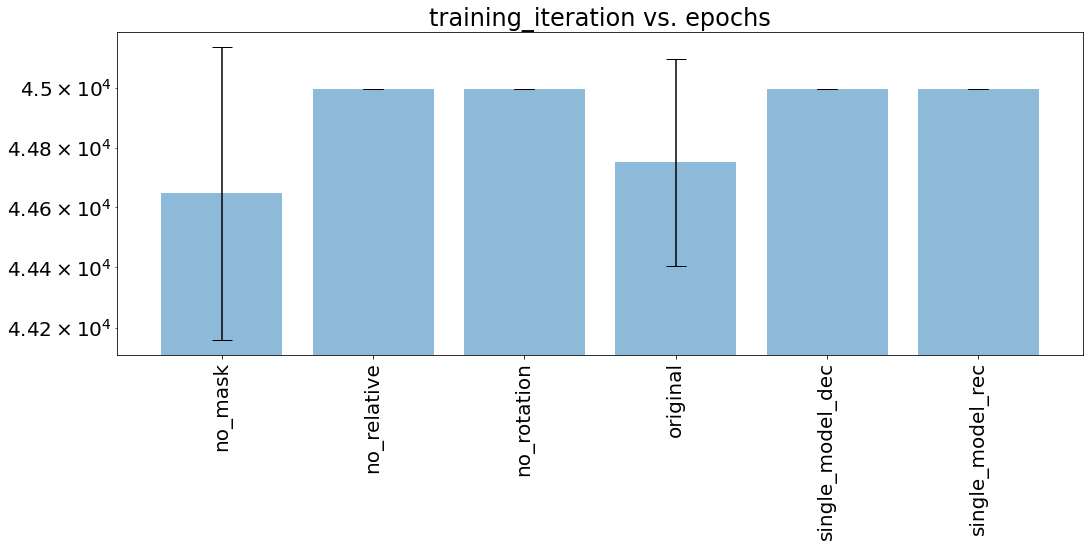

Can't plot experiment_id: Could not convert 1f55c51d58094efcac3d1b7e7d614996e5823187fb6b4b6cbca2e3e8b12fbd24698b46d00cd5452aac44c231ecbd7b80 to numeric
Can't plot date: Could not convert 2021-02-27_07-44-522021-02-27_11-31-492021-02-28_16-12-34 to numeric


/home/sergei/causality-disentanglement-rl/causal_analysis/bar_ablation_ve2_timestamp.pdf

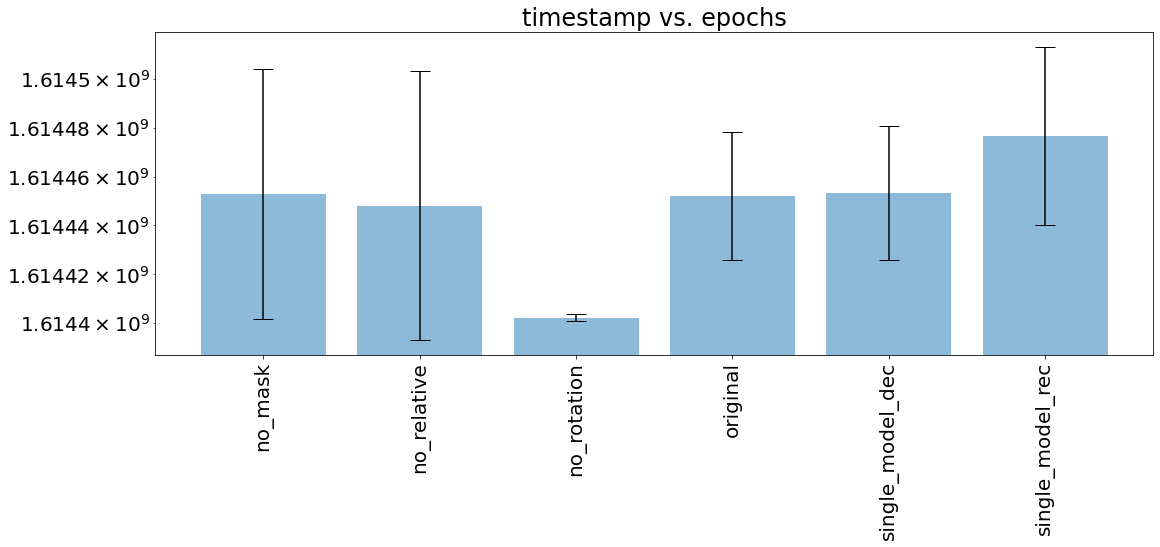

/home/sergei/causality-disentanglement-rl/causal_analysis/bar_ablation_ve2_time_total_s.pdf

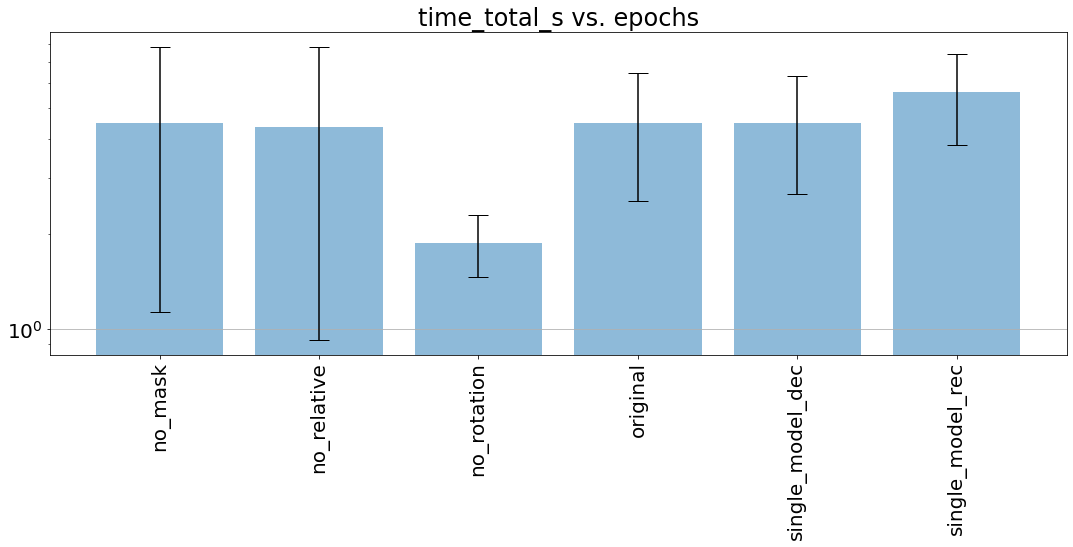

/home/sergei/causality-disentanglement-rl/causal_analysis/bar_ablation_ve2_pid.pdf

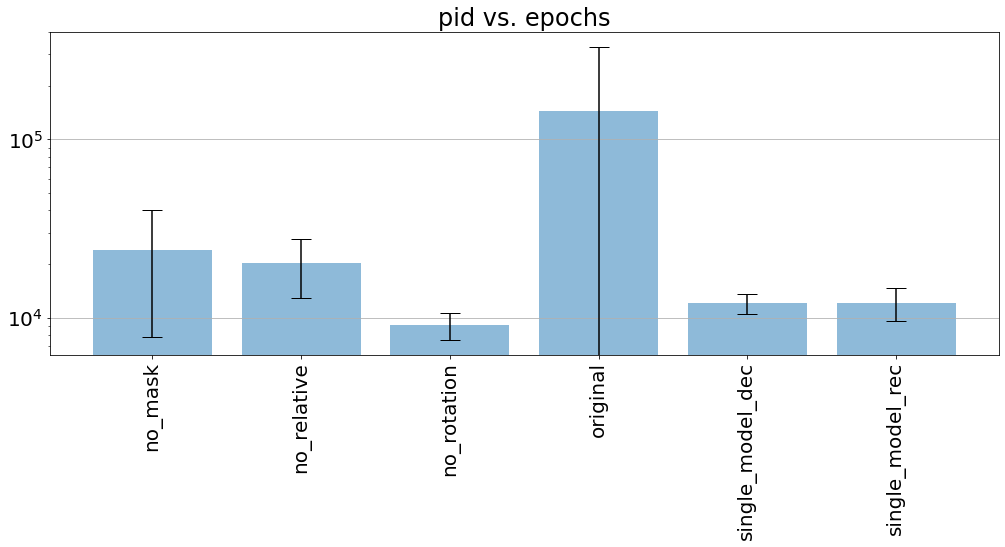

Can't plot hostname: Could not convert a308817dce09iccluster087iccluster087 to numeric
Can't plot node_ip: Could not convert 172.28.0.210.90.40.1310.90.40.13 to numeric
Can't plot config/name: Could not convert rl_const_sparsity_obs_space_env_ve2_with_rew_done_ve2_modes_ablationrl_const_sparsity_obs_space_env_ve2_with_rew_done_ve2_modes_ablationrl_const_sparsity_obs_space_env_ve2_with_rew_done_ve2_modes_ablation to numeric
Can't plot config/base_dir: Could not convert /root/causality-disentanglement-rl/results/rl_const_sparsity_obs_space_env_ve2_with_rew_done_ve2_modes_ablation/2021_02_27_03_10_37__5d4ef608-78a9-11eb-90a6-0242ac1c0002/home/sergei/causality-disentanglement-rl/results/rl_const_sparsity_obs_space_env_ve2_with_rew_done_ve2_modes_ablation/2021_02_27_03_10_55__6820195e-78a9-11eb-927a-90e2baa15230/home/sergei/causality-disentanglement-rl/results/rl_const_sparsity_obs_space_env_ve2_with_rew_done_ve2_modes_ablation/2021_02_27_10_36_31__a8033c0c-78e7-11eb-927a-90e2baa15230 to nu

/home/sergei/causality-disentanglement-rl/causal_analysis/bar_ablation_ve2_time_since_restore.pdf

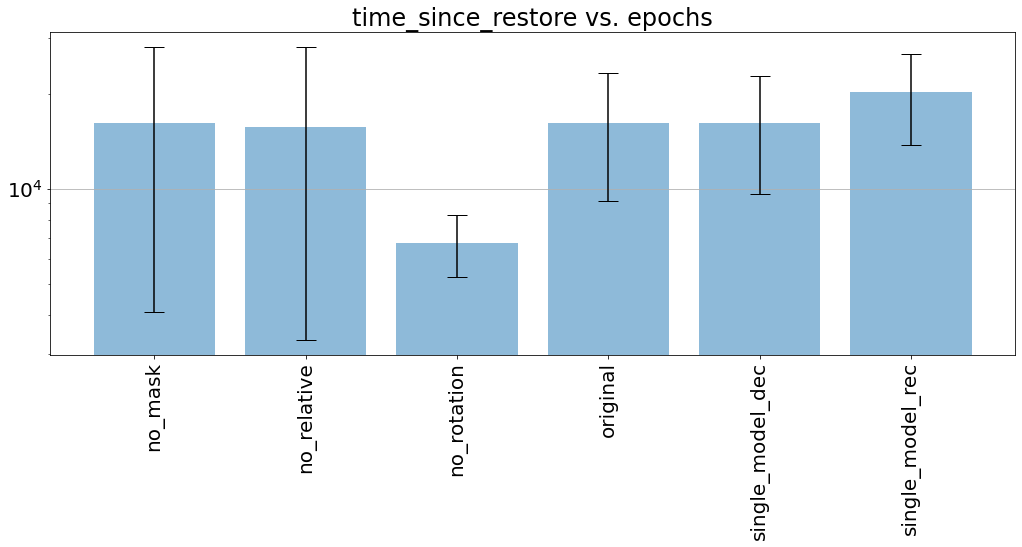

Skipping timesteps_since_restore because all means are equal


/home/sergei/causality-disentanglement-rl/causal_analysis/bar_ablation_ve2_iterations_since_restore.pdf

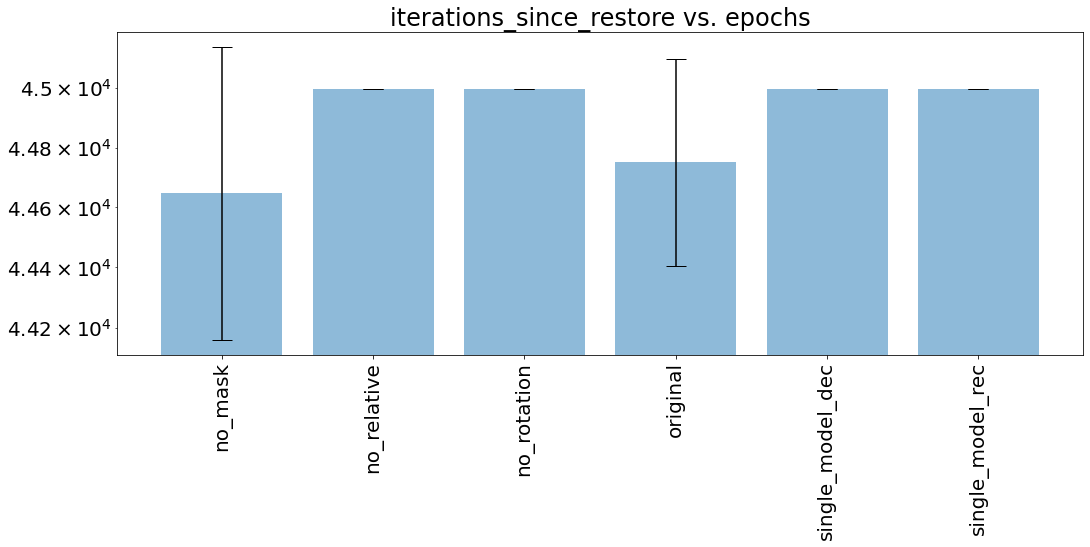

/home/sergei/causality-disentanglement-rl/causal_analysis/bar_ablation_ve2_perfcpu_util_percent.pdf

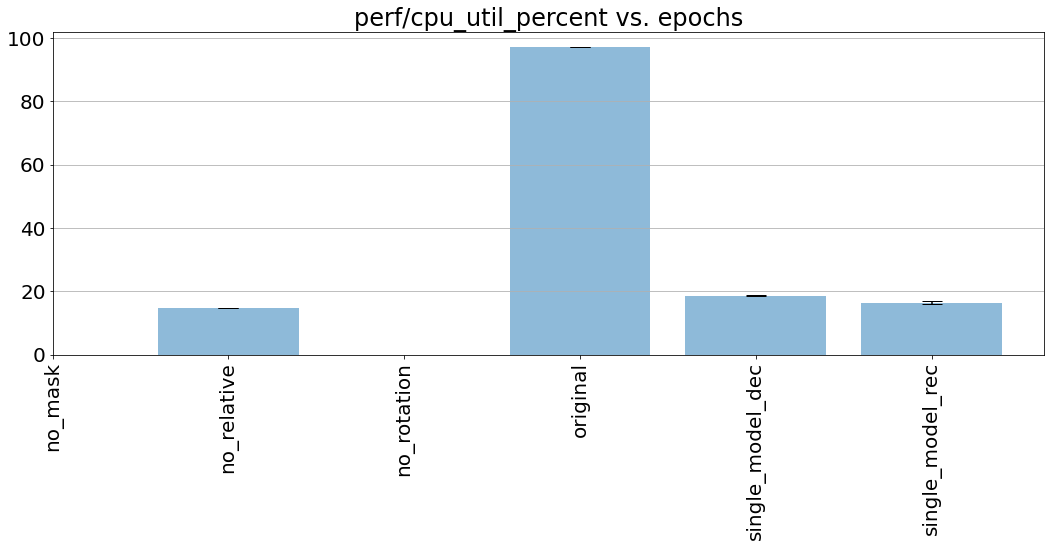

/home/sergei/causality-disentanglement-rl/causal_analysis/bar_ablation_ve2_perfram_util_percent.pdf

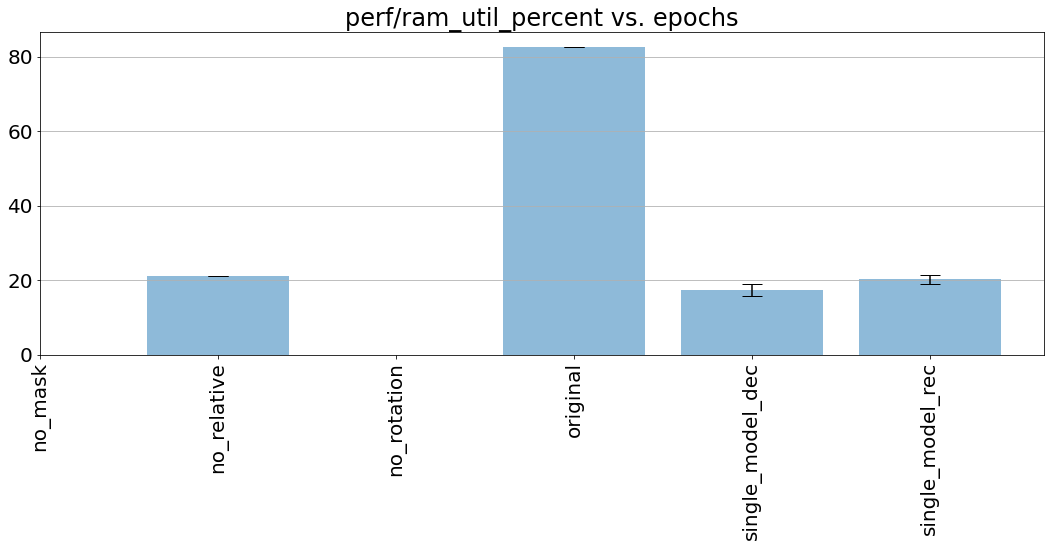

Can't plot trial_id: Could not convert 5d51c_0000268201_00002a8033_00008 to numeric
Can't plot experiment_tag: Could not convert 2__gin__mode__grid_search=no_mask2__gin__mode__grid_search=no_mask8__gin__mode__grid_search=no_mask to numeric


/home/sergei/causality-disentanglement-rl/causal_analysis/bar_ablation_ve2_metricscontext_stats_steps_sampled_laps.pdf

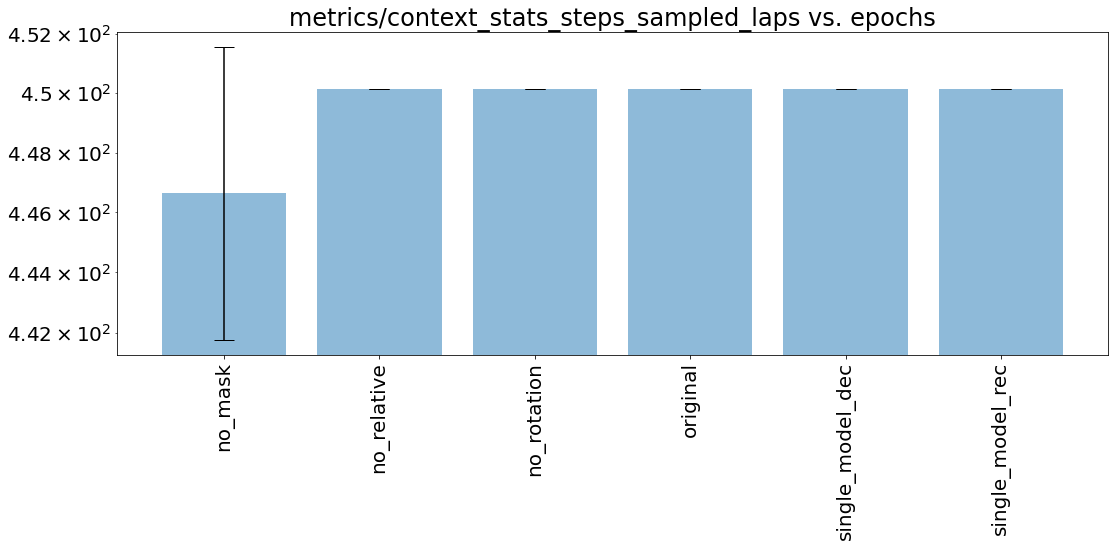

/home/sergei/causality-disentanglement-rl/causal_analysis/bar_ablation_ve2_metricscontext_stats_pending_refs.pdf

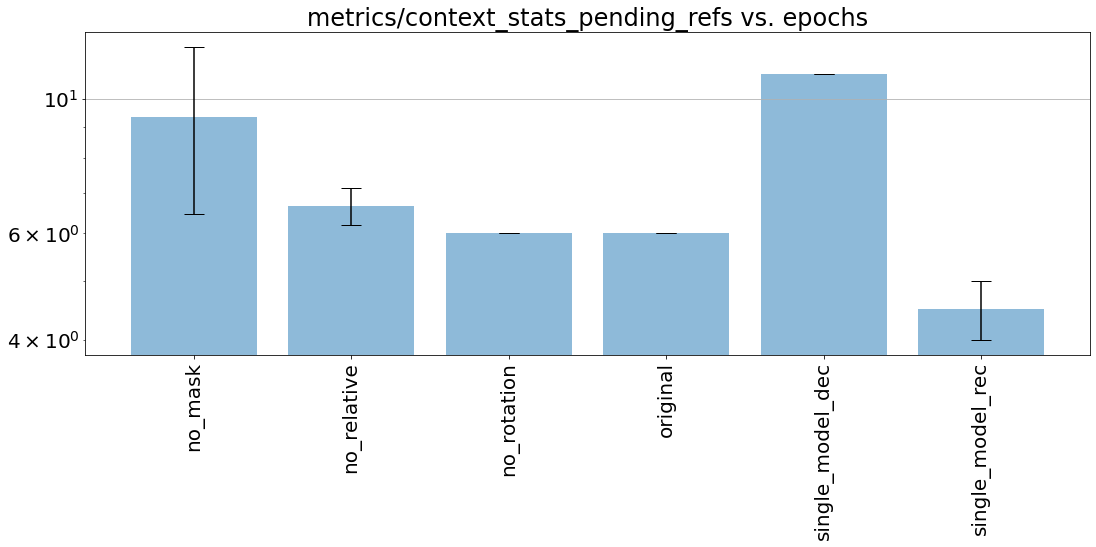

/home/sergei/.local/lib/python3.7/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


/home/sergei/causality-disentanglement-rl/causal_analysis/bar_ablation_ve2_threshold_learner_action.pdf

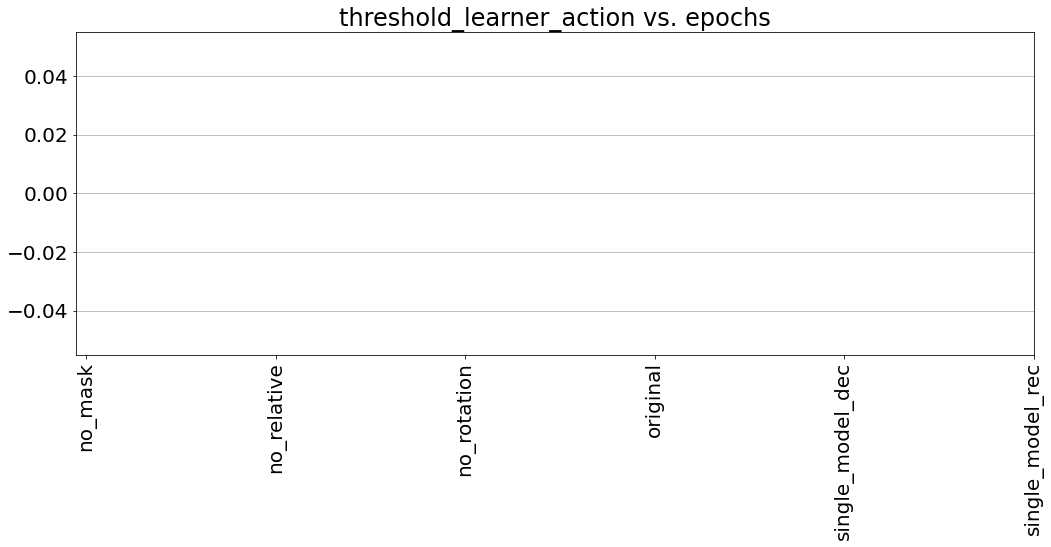

/home/sergei/causality-disentanglement-rl/causal_analysis/bar_ablation_ve2_metricscontext_stats_collect_time_s.pdf

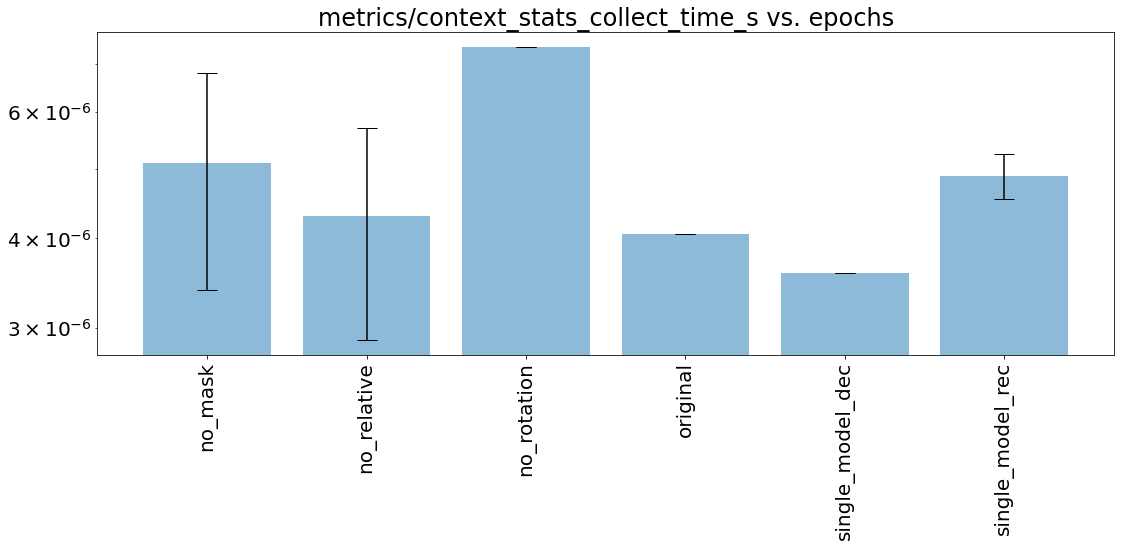

Skipping metrics/context_stats_steps_collected_now because all means are equal


/home/sergei/causality-disentanglement-rl/causal_analysis/bar_ablation_ve2_metricscontext_stats_steps_collected_laps.pdf

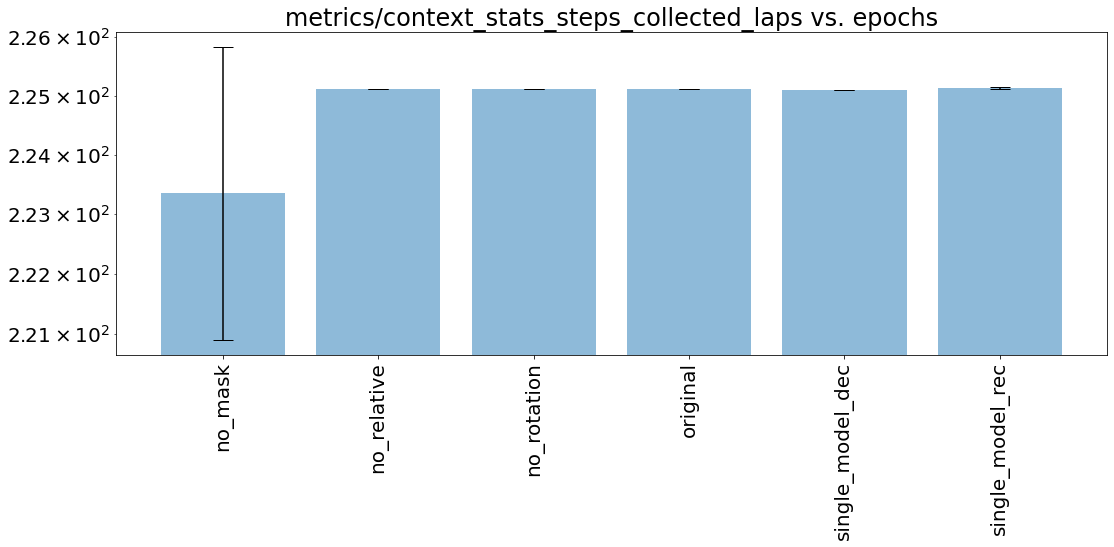

Skipping metrics/context_stats_collect_iters because all means are equal


/home/sergei/causality-disentanglement-rl/causal_analysis/bar_ablation_ve2_metricscontext_stats_steps_collected.pdf

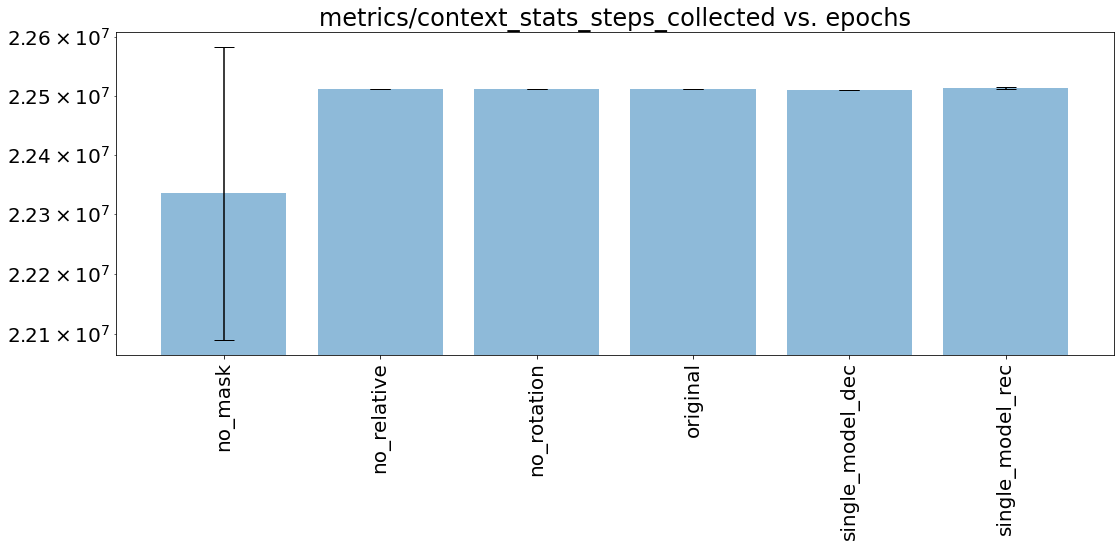

/home/sergei/causality-disentanglement-rl/causal_analysis/bar_ablation_ve2_metricscontext_stats_steps_sampled.pdf

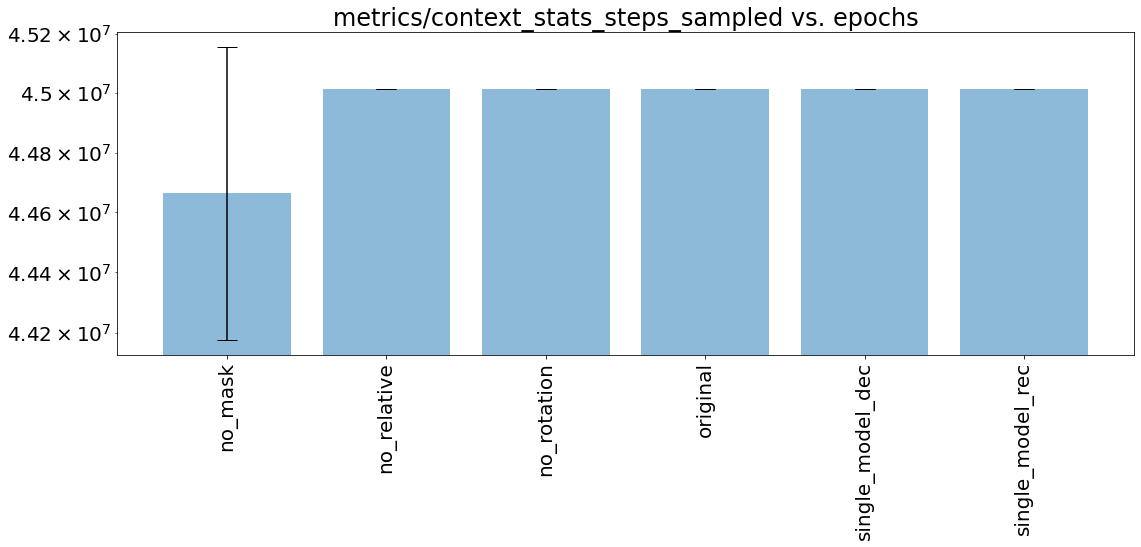

/home/sergei/causality-disentanglement-rl/causal_analysis/bar_ablation_ve2_metricscontext_stats_collected_sampled_ratio.pdf

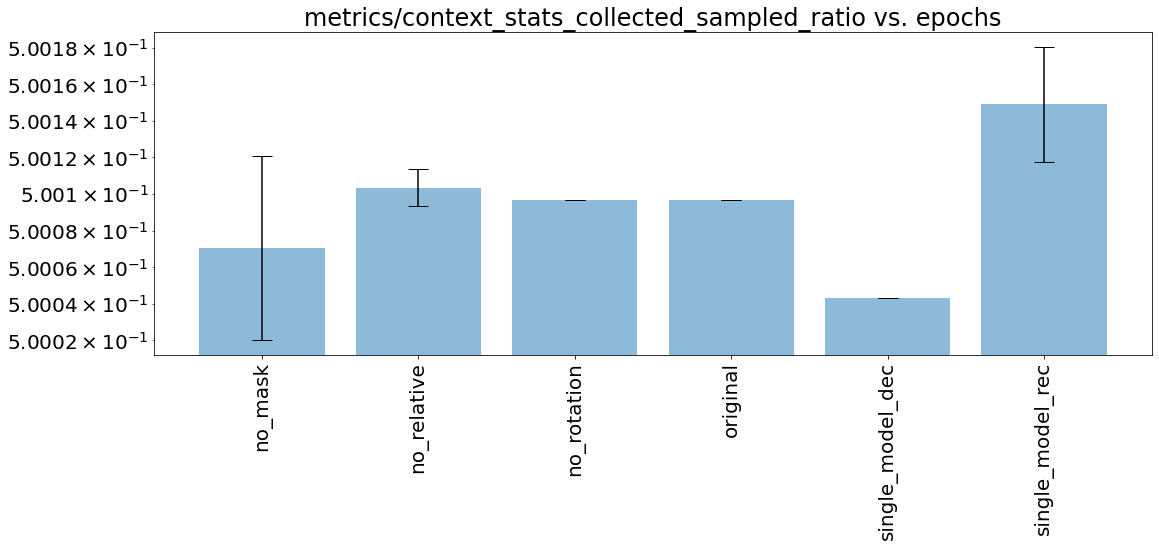

/home/sergei/causality-disentanglement-rl/causal_analysis/bar_ablation_ve2_perfgpu_util_percent0.pdf

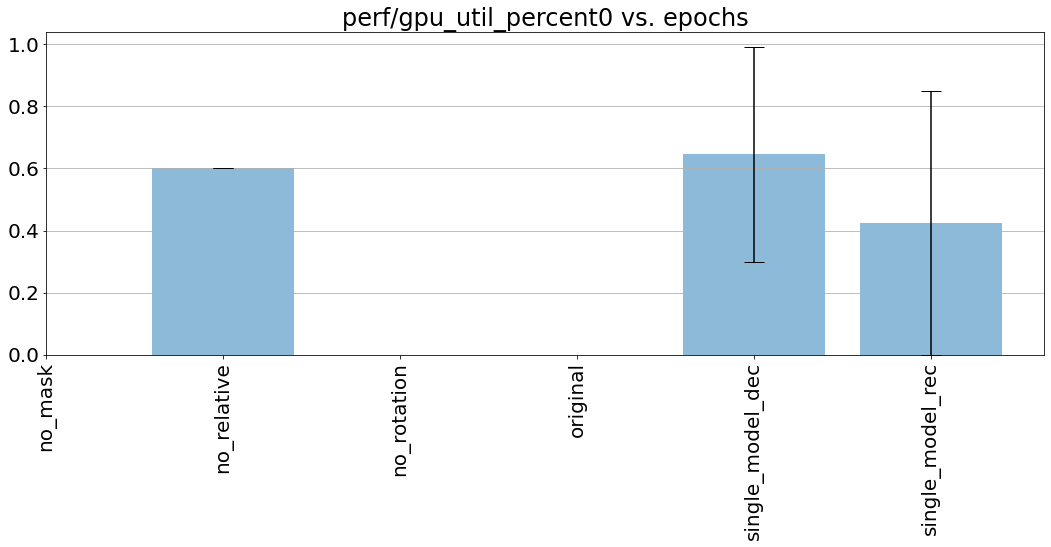

/home/sergei/causality-disentanglement-rl/causal_analysis/bar_ablation_ve2_perfvram_util_percent0.pdf

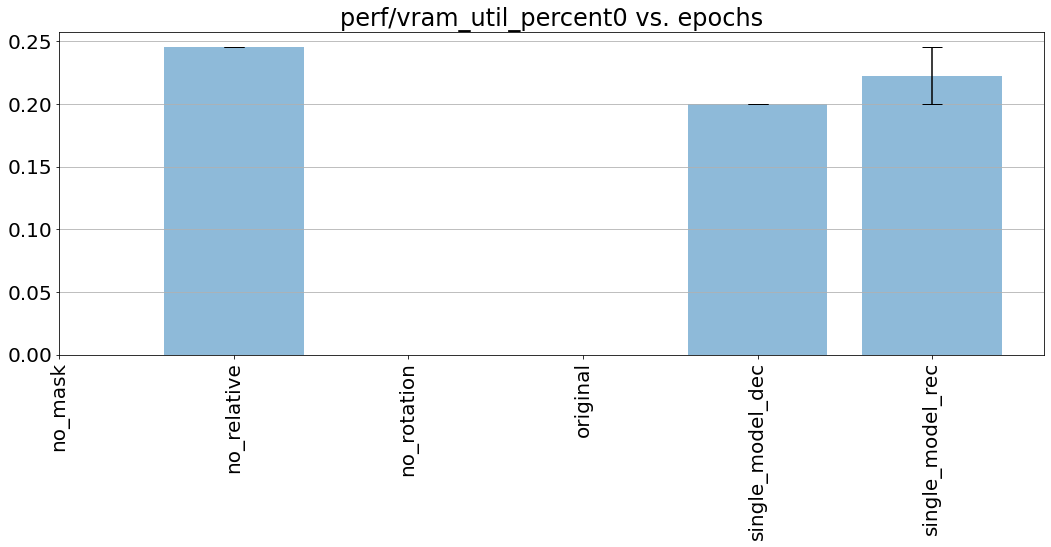

/home/sergei/causality-disentanglement-rl/causal_analysis/bar_ablation_ve2_perfgpu_util_percent1.pdf

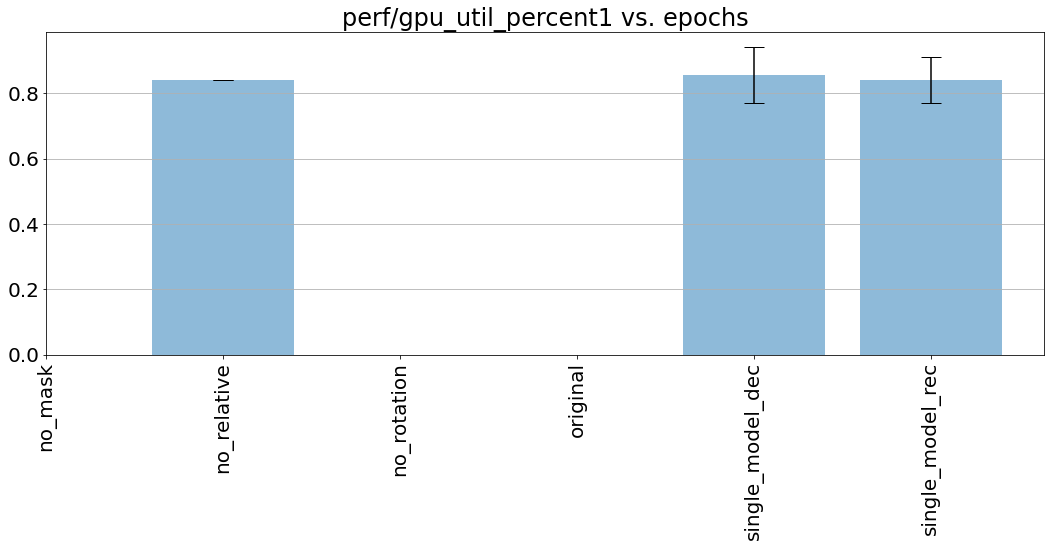

/home/sergei/causality-disentanglement-rl/causal_analysis/bar_ablation_ve2_perfvram_util_percent1.pdf

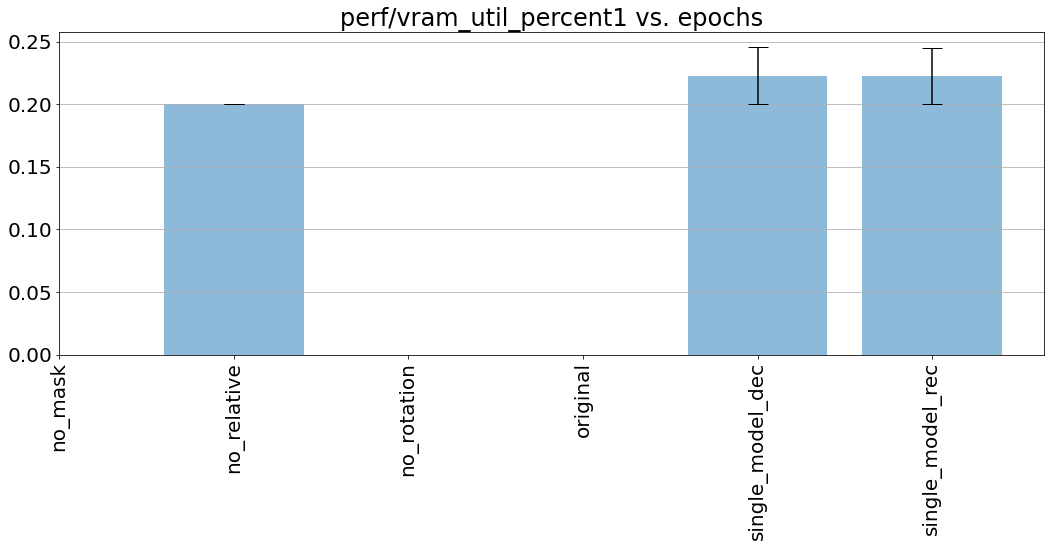

/home/sergei/.local/lib/python3.7/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


/home/sergei/causality-disentanglement-rl/causal_analysis/bar_ablation_ve2_config_gin__mode__choice.pdf

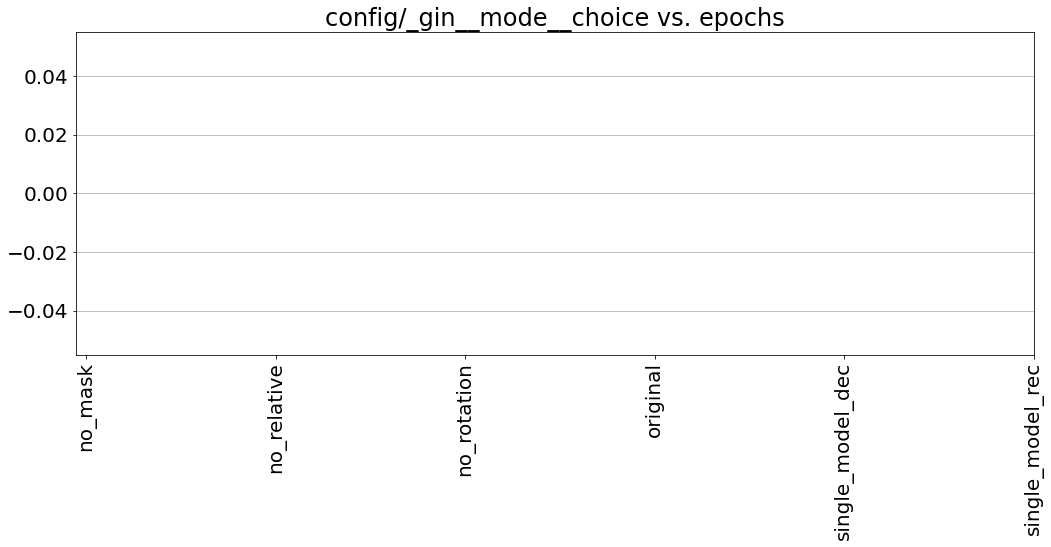

In [37]:
for key in df.columns:
    try:
        plot_bar(key)
    except Exception as e:
        print(f"Can't plot {key}: {e}")

# Plotting models

In [23]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
def find_trial(row, path=path):
    """Get folder name for a trial row."""
    trials = os.listdir(path)
    is_match = [row.trial_id in trial and row.experiment_tag in trial for trial in trials]
    assert sum(is_match) == 1
    idx = np.where(is_match)[0][0]
    trial = trials[idx]
    return trial

In [76]:
import os
from sparse_causal_model_learner_rl.config import Config
from causal_util.helpers import CPU_Unpickler
os.environ['CUDA_VISIBLE_DEVICES'] = "-1"
import gin
from path import Path
gin.bind_parameter('Config._unpickle_skip_init', True)
gin.enter_interactive_mode()

In [65]:
trial_names = [find_trial(row) for _, row in df.iterrows()]

In [66]:
def adhoc_model(l):
    """Get an instance with Mf, Ma attributes."""
    class m():
        def __init__(self, Mf, Ma):
            self.Mf = Mf
            self.Ma = Ma
    n_f = l._unpickled_state['config'].get('feature_shape')[0]
    fadd = l._unpickled_state['config'].get('additional_feature_keys')
    gin.bind_parameter('graph_for_matrices.additional_features', fadd)
    gin.bind_parameter('plot_model.vmin', 0.0)
    gin.bind_parameter('plot_model.singlecolor_palette', True)
    gin.bind_parameter('plot_model.additional_features', fadd)
    P = l._unpickled_state['trainables_weights']['model']['model.switch.probas']
    Mf = P[:, :n_f].detach().cpu().numpy()
    Ma = P[:, n_f:].detach().cpu().numpy()
    model = m(Mf, Ma)
    return model

In [79]:
def plot_trial_images(trial):
    trial_path = os.path.join(path, trial)
    checkpoints = [x for x in os.listdir(trial_path) if x.startswith('checkpoint')]
    checkpoint_epochs = {x: int(x.split('_')[1]) for x in checkpoints}
    checkpoints_rev = sorted(checkpoints, key=lambda x: checkpoint_epochs[x], reverse=True)
    
    l = None
    for checkpoint in checkpoints_rev:
        print("Trying checkpoint", checkpoint)
        try:
            ckpt_path = os.path.join(trial_path, checkpoint, 'checkpoint')
            with open(ckpt_path, 'rb') as f:
                l = CPU_Unpickler(f).load()
            break
        except Exception as e:
            print("Can't read", checkpoint)
            
    if l is None:
        raise ValueError("No checkpoints for trial", trial)
        
    img_prefix = trial#f'{trial}_{checkpoint}'
    os.makedirs(img_prefix, exist_ok=True)

    model = adhoc_model(l)
    
    with Path(img_prefix):
        fig = l.visualize_model(model)
        fig.savefig('model.png', bbox_inches='tight')
        plt.close(fig)
        plt.clf()

        l.visualize_graph(model=model, do_write=True)[2]

In [80]:
_ = process_map(plot_trial_images, trial_names, max_workers=4)

Trying checkpointTrying checkpointTrying checkpointTrying checkpoint    checkpoint_45000checkpoint_45000
checkpoint_45000checkpoint_45000

/home/sergei/miniconda3/envs/causal/lib/python3.7/site-packages/cloudpickle/cloudpickle.py:704: UserWarning: A pickle file created using an old (<=1.4.1) version of cloudpicke is currently being loaded. This is not supported by cloudpickle and will break in cloudpickle 1.7
  "will break in cloudpickle 1.7", category=UserWarning


/home/sergei/miniconda3/envs/causal/lib/python3.7/site-packages/cloudpickle/cloudpickle.py:704: UserWarning: A pickle file created using an old (<=1.4.1) version of cloudpicke is currently being loaded. This is not supported by cloudpickle and will break in cloudpickle 1.7
  "will break in cloudpickle 1.7", category=UserWarning
/home/sergei/miniconda3/envs/causal/lib/python3.7/site-packages/cloudpickle/cloudpickle.py:704: UserWarning: A pickle file created using an old (<=1.4.1) version of cloudpicke is currently being loaded. This is not supported by cloudpickle and will break in cloudpickle 1.7
  "will break in cloudpickle 1.7", category=UserWarning
/home/sergei/miniconda3/envs/causal/lib/python3.7/site-packages/cloudpickle/cloudpickle.py:704: UserWarning: A pickle file created using an old (<=1.4.1) version of cloudpicke is currently being loaded. This is not supported by cloudpickle and will break in cloudpickle 1.7
  "will break in cloudpickle 1.7", category=UserWarning


Trying checkpoint checkpoint_45000


/home/sergei/miniconda3/envs/causal/lib/python3.7/site-packages/cloudpickle/cloudpickle.py:704: UserWarning: A pickle file created using an old (<=1.4.1) version of cloudpicke is currently being loaded. This is not supported by cloudpickle and will break in cloudpickle 1.7
  "will break in cloudpickle 1.7", category=UserWarning


Trying checkpoint checkpoint_45000


/home/sergei/miniconda3/envs/causal/lib/python3.7/site-packages/cloudpickle/cloudpickle.py:704: UserWarning: A pickle file created using an old (<=1.4.1) version of cloudpicke is currently being loaded. This is not supported by cloudpickle and will break in cloudpickle 1.7
  "will break in cloudpickle 1.7", category=UserWarning


Trying checkpoint checkpoint_45000


/home/sergei/miniconda3/envs/causal/lib/python3.7/site-packages/cloudpickle/cloudpickle.py:704: UserWarning: A pickle file created using an old (<=1.4.1) version of cloudpicke is currently being loaded. This is not supported by cloudpickle and will break in cloudpickle 1.7
  "will break in cloudpickle 1.7", category=UserWarning


Trying checkpoint checkpoint_45000
Can't read checkpoint_45000
Trying checkpoint checkpoint_44000
Can't read checkpoint_44000
Trying checkpoint checkpoint_43000
Can't read checkpoint_43000
Trying checkpoint checkpoint_42000
Can't read checkpoint_42000
Trying checkpoint checkpoint_41000
Can't read checkpoint_41000
Trying checkpoint checkpoint_40000


/home/sergei/miniconda3/envs/causal/lib/python3.7/site-packages/cloudpickle/cloudpickle.py:704: UserWarning: A pickle file created using an old (<=1.4.1) version of cloudpicke is currently being loaded. This is not supported by cloudpickle and will break in cloudpickle 1.7
  "will break in cloudpickle 1.7", category=UserWarning


Can't read checkpoint_40000
Trying checkpoint checkpoint_39000


Trying checkpoint checkpoint_45000


/home/sergei/miniconda3/envs/causal/lib/python3.7/site-packages/cloudpickle/cloudpickle.py:704: UserWarning: A pickle file created using an old (<=1.4.1) version of cloudpicke is currently being loaded. This is not supported by cloudpickle and will break in cloudpickle 1.7
  "will break in cloudpickle 1.7", category=UserWarning


Trying checkpointTrying checkpoint  checkpoint_45000
checkpoint_43000


/home/sergei/miniconda3/envs/causal/lib/python3.7/site-packages/cloudpickle/cloudpickle.py:704: UserWarning: A pickle file created using an old (<=1.4.1) version of cloudpicke is currently being loaded. This is not supported by cloudpickle and will break in cloudpickle 1.7
  "will break in cloudpickle 1.7", category=UserWarning
/home/sergei/miniconda3/envs/causal/lib/python3.7/site-packages/cloudpickle/cloudpickle.py:704: UserWarning: A pickle file created using an old (<=1.4.1) version of cloudpicke is currently being loaded. This is not supported by cloudpickle and will break in cloudpickle 1.7
  "will break in cloudpickle 1.7", category=UserWarning


Trying checkpoint checkpoint_45000


Trying checkpoint checkpoint_45000


Trying checkpoint checkpoint_45000


Trying checkpoint checkpoint_45000


Trying checkpoint checkpoint_45000


Trying checkpoint checkpoint_45000


Trying checkpoint checkpoint_45000


Trying checkpoint checkpoint_45000


Trying checkpoint checkpoint_40000


Trying checkpoint checkpoint_45000


Trying checkpoint checkpoint_45000


Trying checkpoint checkpoint_45000


Trying checkpoint checkpoint_45000


Trying checkpoint checkpoint_45000


Trying checkpoint checkpoint_45000
Trying checkpoint checkpoint_45000


Trying checkpoint checkpoint_45000


Trying checkpoint checkpoint_45000


Trying checkpoint checkpoint_45000


Trying checkpoint checkpoint_45000


Trying checkpoint checkpoint_45000


Trying checkpoint checkpoint_45000


Trying checkpoint checkpoint_45000


Trying checkpoint checkpoint_45000


Trying checkpoint checkpoint_45000


Trying checkpoint checkpoint_45000


In [97]:
from IPython.display import display, HTML

def html_table(df, image_key='model.png'):
    for mode, df_mode in df.groupby(mode_key):
        print(mode)
        html = "<table><tr>"
        for _, row in df_mode.iterrows():
            trial = find_trial(row)
            img = os.path.join(trial, image_key)
            html += f"<td><img src='{img}' style='height: 100px' /></td>"
        html += "</tr></table>"
        display(HTML(html))

In [99]:
html_table(df, 'model.png')

no_mask


,,


no_model_id_init


,,,


no_relative


,,


no_rotation


,


original


,,


single_feature


,,,


single_model_dec


,,


single_model_rec


,,,


start_from_zero


,,


ten_features


,,,


two_features


,,,


In [100]:
html_table(df, 'CausalModel.png')

no_mask


,,


no_model_id_init


,,,


no_relative


,,


no_rotation


,


original


,,


single_feature


,,,


single_model_dec


,,


single_model_rec


,,,


start_from_zero


,,


ten_features


,,,


two_features


,,,


In [109]:
trial = find_trial(df[df[mode_key] == 'ten_features'].iloc[0])

In [112]:
trial_path = os.path.join(path, trial)
checkpoints = [x for x in os.listdir(trial_path) if x.startswith('checkpoint')]
checkpoint_epochs = {x: int(x.split('_')[1]) for x in checkpoints}
checkpoints_rev = sorted(checkpoints, key=lambda x: checkpoint_epochs[x], reverse=True)

l = None
for checkpoint in checkpoints_rev:
    print("Trying checkpoint", checkpoint)
    try:
        ckpt_path = os.path.join(trial_path, checkpoint, 'checkpoint')
        with open(ckpt_path, 'rb') as f:
            l = CPU_Unpickler(f).load()
            break
    except:
        pass

Trying checkpoint checkpoint_45000


In [124]:
ckpt_path

'/home/upload/ray_results/rl_const_sparsity_obs_space_env_ve2_with_rew_done_ve2_modes_ablation/main_fcn_264be_00002_2__gin__mode__grid_search=ten_features_2021-02-27_10-40-03/checkpoint_45000/checkpoint'

In [121]:
l._unpickled_state['config']['feature_shape']

(3,)

In [123]:
print(l._unpickled_state['gin_config'])

import causal_util.helpers
import encoder.digit_encoder
import encoder.observation_encoder
import gin_tune
import sparse_causal_model_learner_rl.annealer.threshold
import sparse_causal_model_learner_rl.config
import sparse_causal_model_learner_rl.configs.search_helpers.ablation_study
import sparse_causal_model_learner_rl.learners.input_normalizer
import sparse_causal_model_learner_rl.learners.rl_data
import sparse_causal_model_learner_rl.learners.rl_learner
import sparse_causal_model_learner_rl.loss.losses
import sparse_causal_model_learner_rl.loss.optimizer
import sparse_causal_model_learner_rl.metrics.context_rewrite
import sparse_causal_model_learner_rl.metrics.episode_reward
import sparse_causal_model_learner_rl.metrics.graph_threshold
import sparse_causal_model_learner_rl.metrics.loss_thresholded
import sparse_causal_model_learner_rl.metrics.max_element
import sparse_causal_model_learner_rl.metrics.metric_smooth
import sparse_causal_model_learner_rl.metrics.model_entropy
import sp

In [129]:
l._unpickled_state['trainables_weights']['model']['model.switch.probas'].shape

torch.Size([5, 5])

### &rArr; feature dimension setting does NOT work for some reason -- gin issue???

### what happens with start_from_0? is it slow, or stuck?

In [158]:
trial = find_trial(df[df[mode_key] == 'start_from_zero'].iloc[0])

In [159]:
trial

'main_fcn_264be_00006_6__gin__mode__grid_search=start_from_zero_2021-02-27_17-05-31'

In [162]:
df_trial = get_df_from_logdir(os.path.join(path, trial), do_tqdm=True)

In [178]:
df_trial.columns

Index(['epochs', 'n_samples', 'losses/opt1/fit/coeff', 'losses/opt1/fit/value',
       'losses/opt1/sparsity/coeff', 'losses/opt1/sparsity/value',
       'losses/opt1/fit_all_on/coeff', 'losses/opt1/fit_all_on/value',
       'losses/opt1/reconstruction/coeff', 'losses/opt1/reconstruction/value',
       'losses/opt1/fit_all_half/coeff', 'losses/opt1/fit_all_half/value',
       'losses/opt1/value', 'grads/opt1/grad_total_l1mean',
       'grads/opt1/grad_total_l2sum', 'metrics/batch_index',
       'metrics/batch_size', 'metrics/fit/mean_feature',
       'metrics/fit/std_feature', 'metrics/fit/min_feature',
       'metrics/fit/max_feature', 'metrics/fit/loss_fcons',
       'metrics/fit/loss_add', 'metrics/fit/loss_rec',
       'metrics/fit/loss_fcons_pre', 'metrics/fit/rec_fit_acc_loss_01_agg',
       'metrics/sparsity/sparsity_param_0_(5, 5)',
       'metrics/fit_all_on/mean_feature', 'metrics/fit_all_on/std_feature',
       'metrics/fit_all_on/min_feature', 'metrics/fit_all_on/max_featur

In [180]:
def plot_trial_bykey(key, df_trial=df_trial):
    s = df_trial[key]
    s = s[~pd.isnull(s)]
    plt.plot(s.index, s)
    plt.yscale('log')
    plt.title(key)
    plt.show()

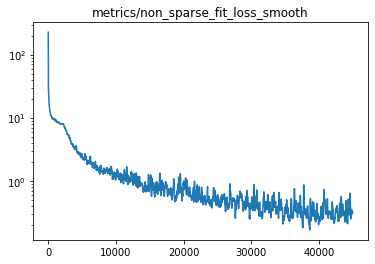

In [181]:
plot_trial_bykey('metrics/non_sparse_fit_loss_smooth')

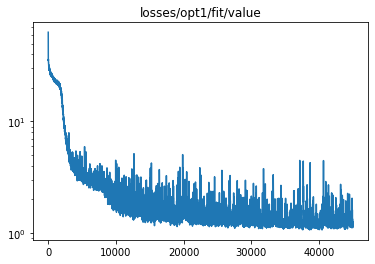

In [182]:
plot_trial_bykey('losses/opt1/fit/value')

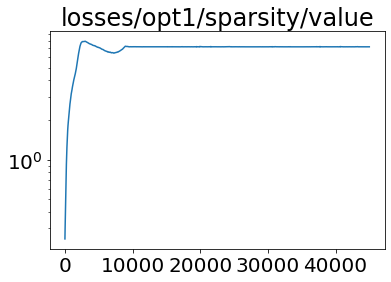

In [186]:
plot_trial_bykey('losses/opt1/sparsity/value')